##  Preliminary Analysis 

Alex Lu 
January 25th, 2019 

---

Analysis of artificial aneurysms introduced in the RCA and LAD for `z_scores = [6, 8, 10, 12, 14]`, with following params: 
* RCA: ASI = 2, positions = proximal, medial, distal
* RCA: ASI = 4, positions = proximal
* RCA: ASI = 6, positions = proximal
* LAD: ASI = 2, positions = proximal 
* LAD: ASI = 4, positions = proximal
* LAD: ASI = 6, positions = proximal 


Import external dependencies.

In [1]:
import numpy as np
import vtk
from vtk.util import numpy_support as nps
import pickle
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns 
import pandas as pd
import os 
from IPython.display import HTML

from matplotlib import rc
plt.rcParams.update(plt.rcParamsDefault)
%config InlineBackend.figure_format = 'retina'

Import other requirements

In [2]:
from AneurysmGeneration.utils.batch import *  # for I/O

Configure display styles 

In [3]:
sns.set(rc={"figure.figsize":(8,6)})
sns.set_style('white', {'axes.spines.right':False})
sns.set_style('ticks')
sns.set_context('talk')
sns.despine(trim=True)

<Figure size 576x432 with 0 Axes>

Defining which parameters are being investigated. 

In [4]:
shapes = ['ASI2', 'ASI4', 'ASI6']
proximal = ['p1', 'p2', 'p3', 'p4', 'p5']
medial = ['m1', 'm2', 'm3', 'm4', 'm5']
distal = ['d1', 'd2', 'd3', 'd4', 'd5']
z_scores = [6, 8, 10, 12, 14]
left = ['lad1', 'lad2', 'lad3', 'lad4', 'lad5',]

## Right side 

In [5]:
vessel = 'RCA/'

We're going to look at the distribution of time-averaged wall shear stress over the surface (expressed as percentage of area exposed to a certain wall shear stress threshold). 

In [6]:
all_area_fractions_right = read_from_file('WSS_THRESHOLD_AREA_RCA')

reading structures from pickle
------------------------------


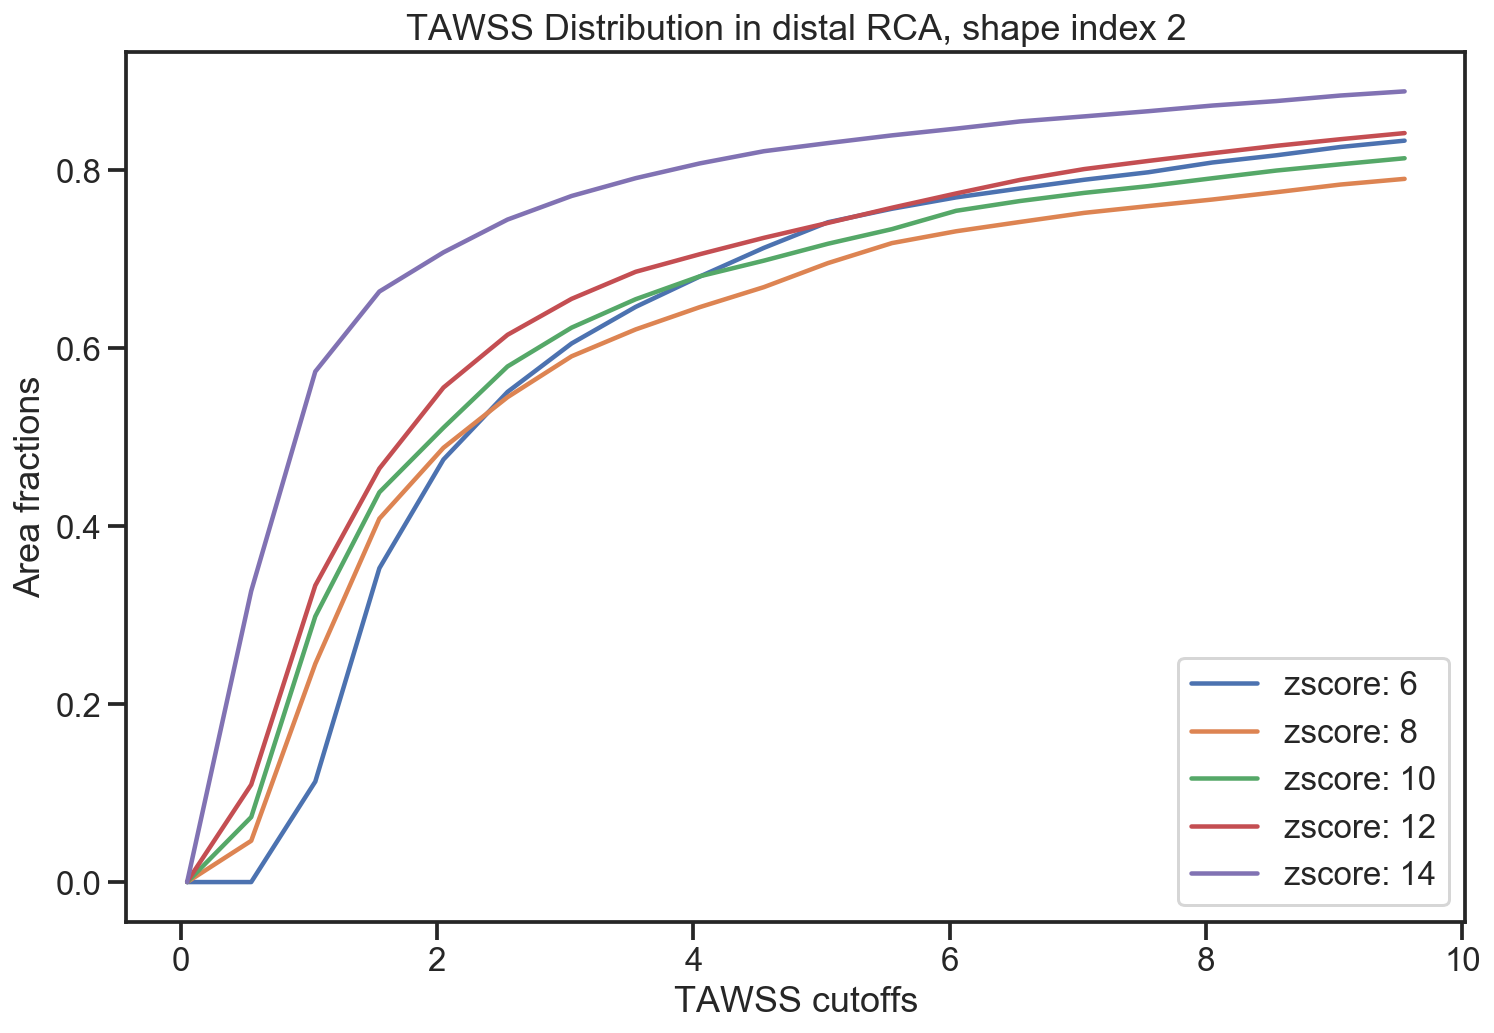

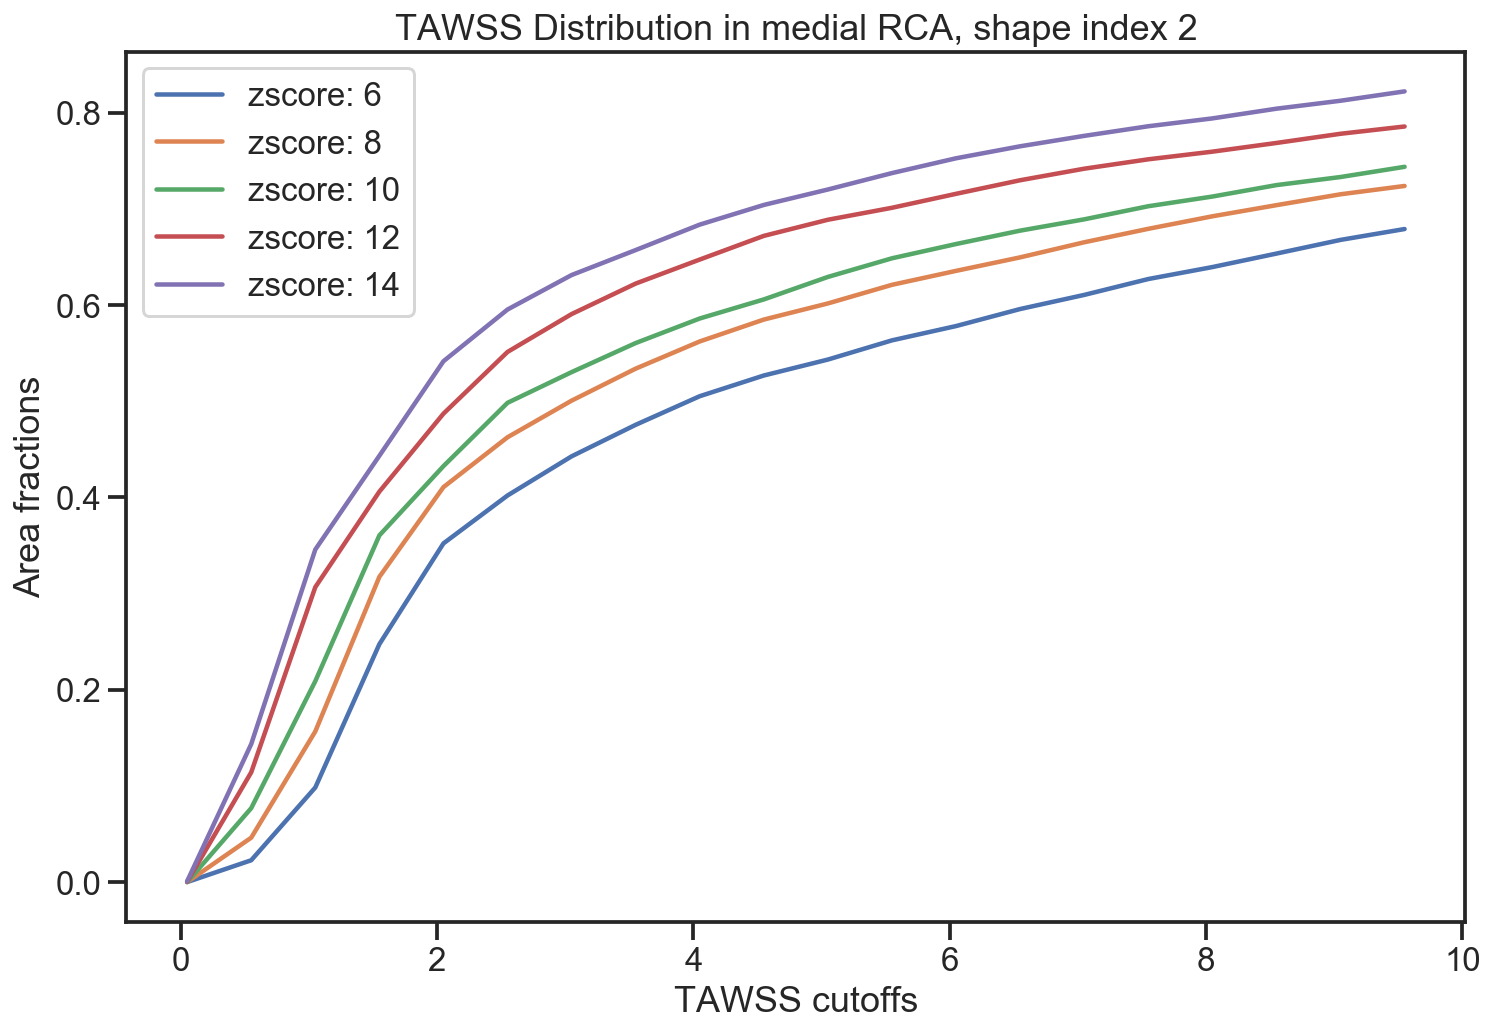

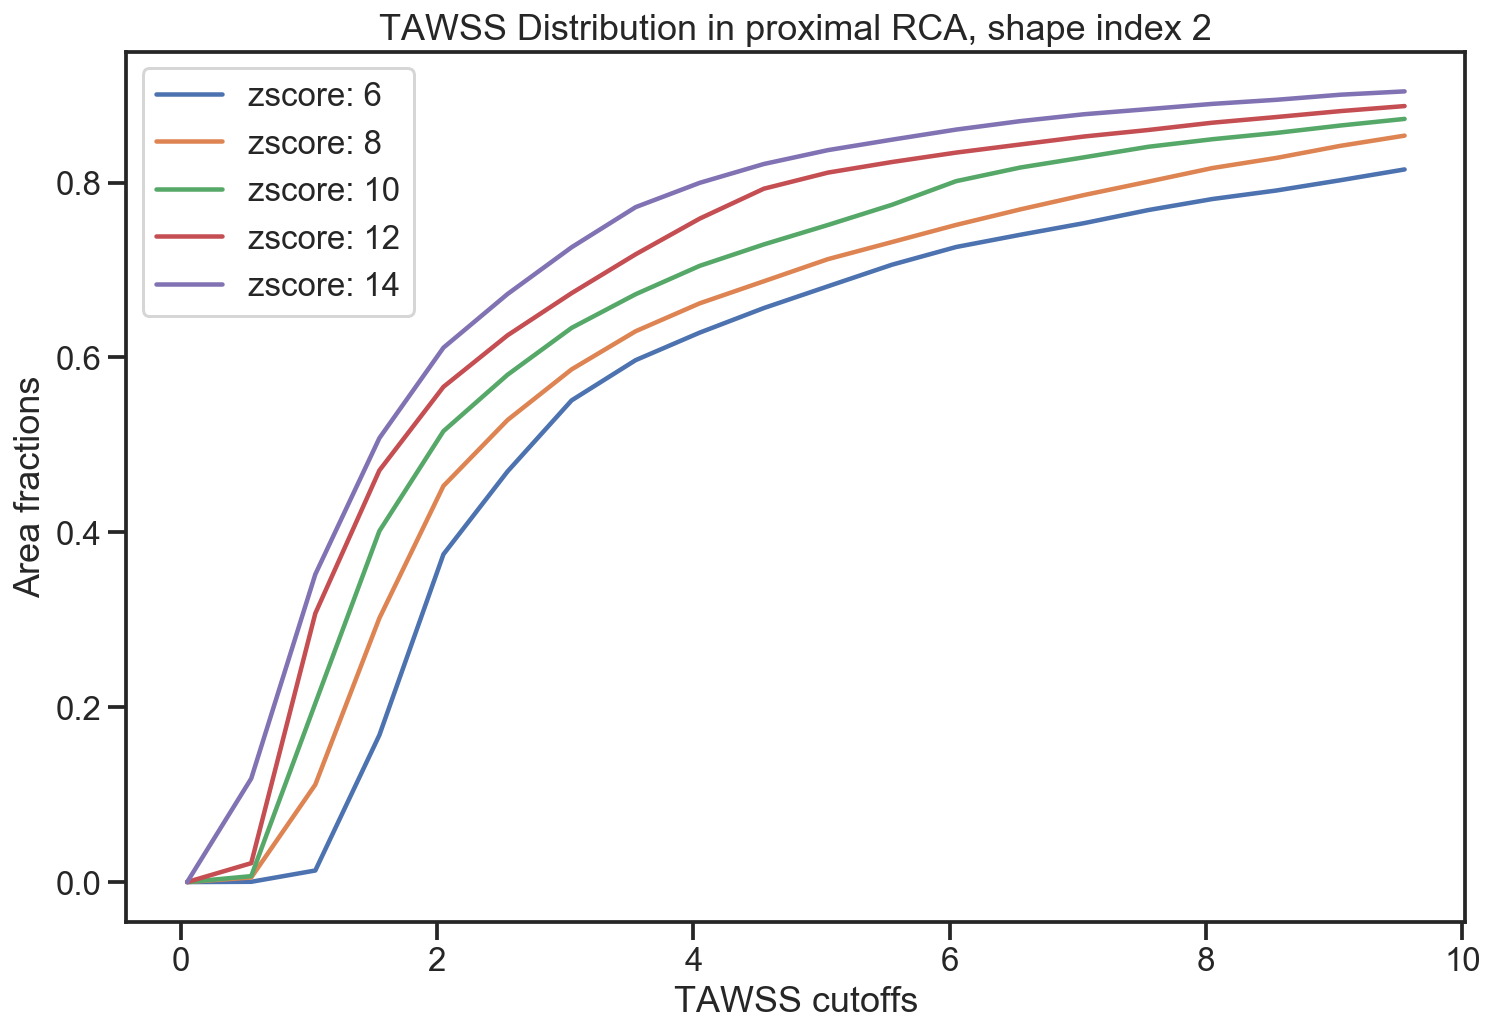

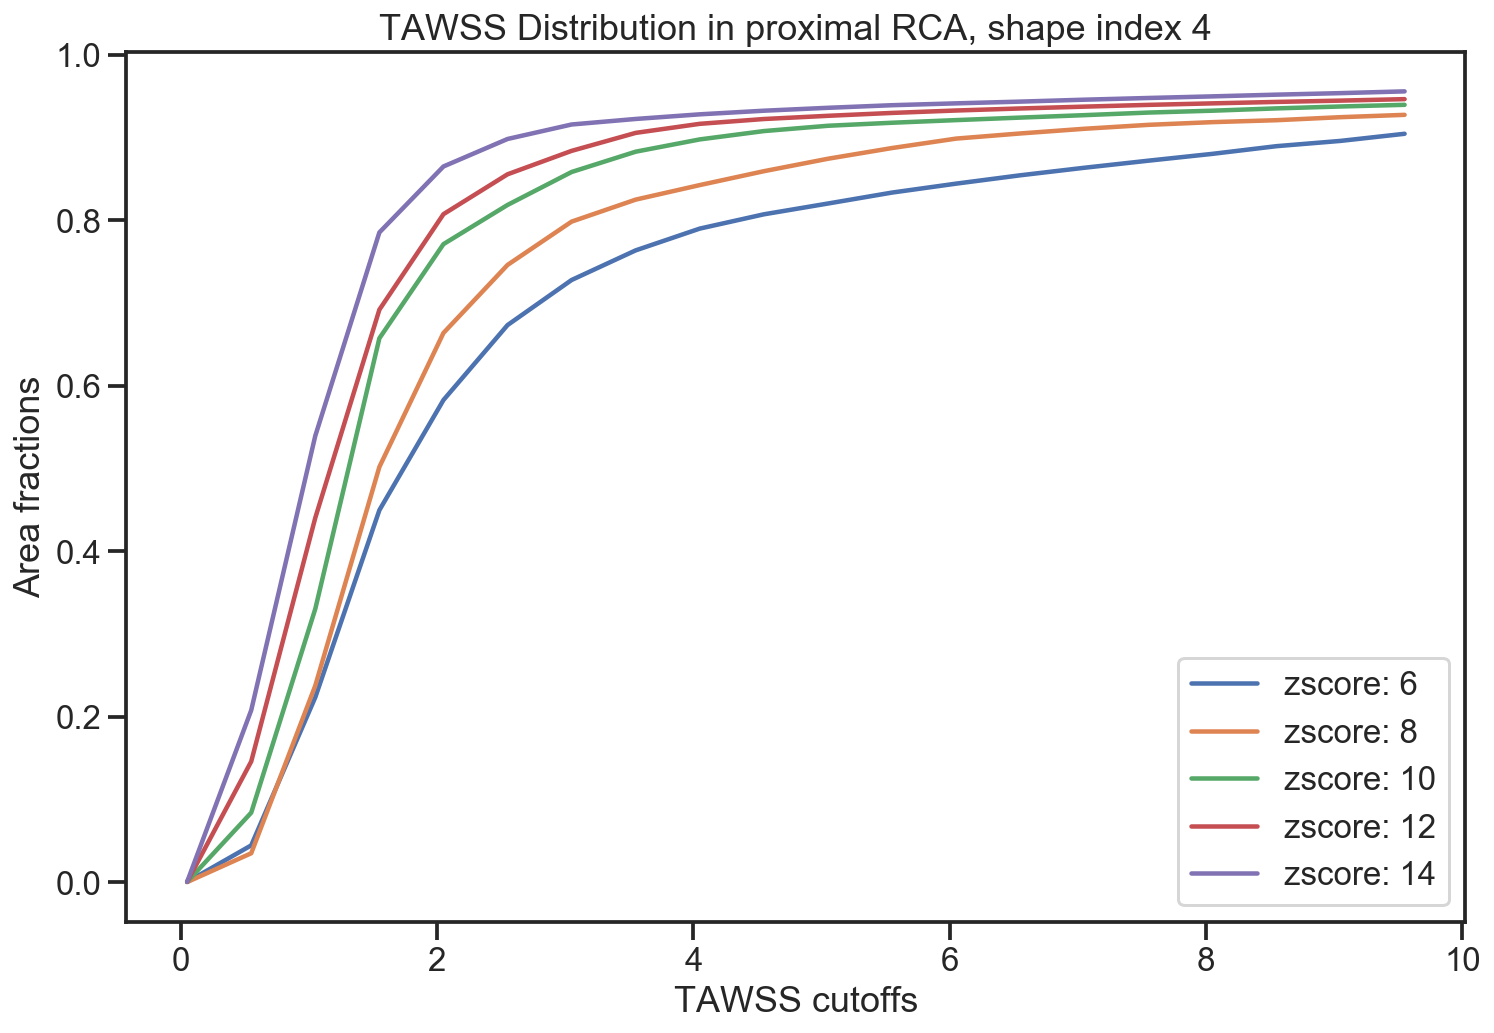

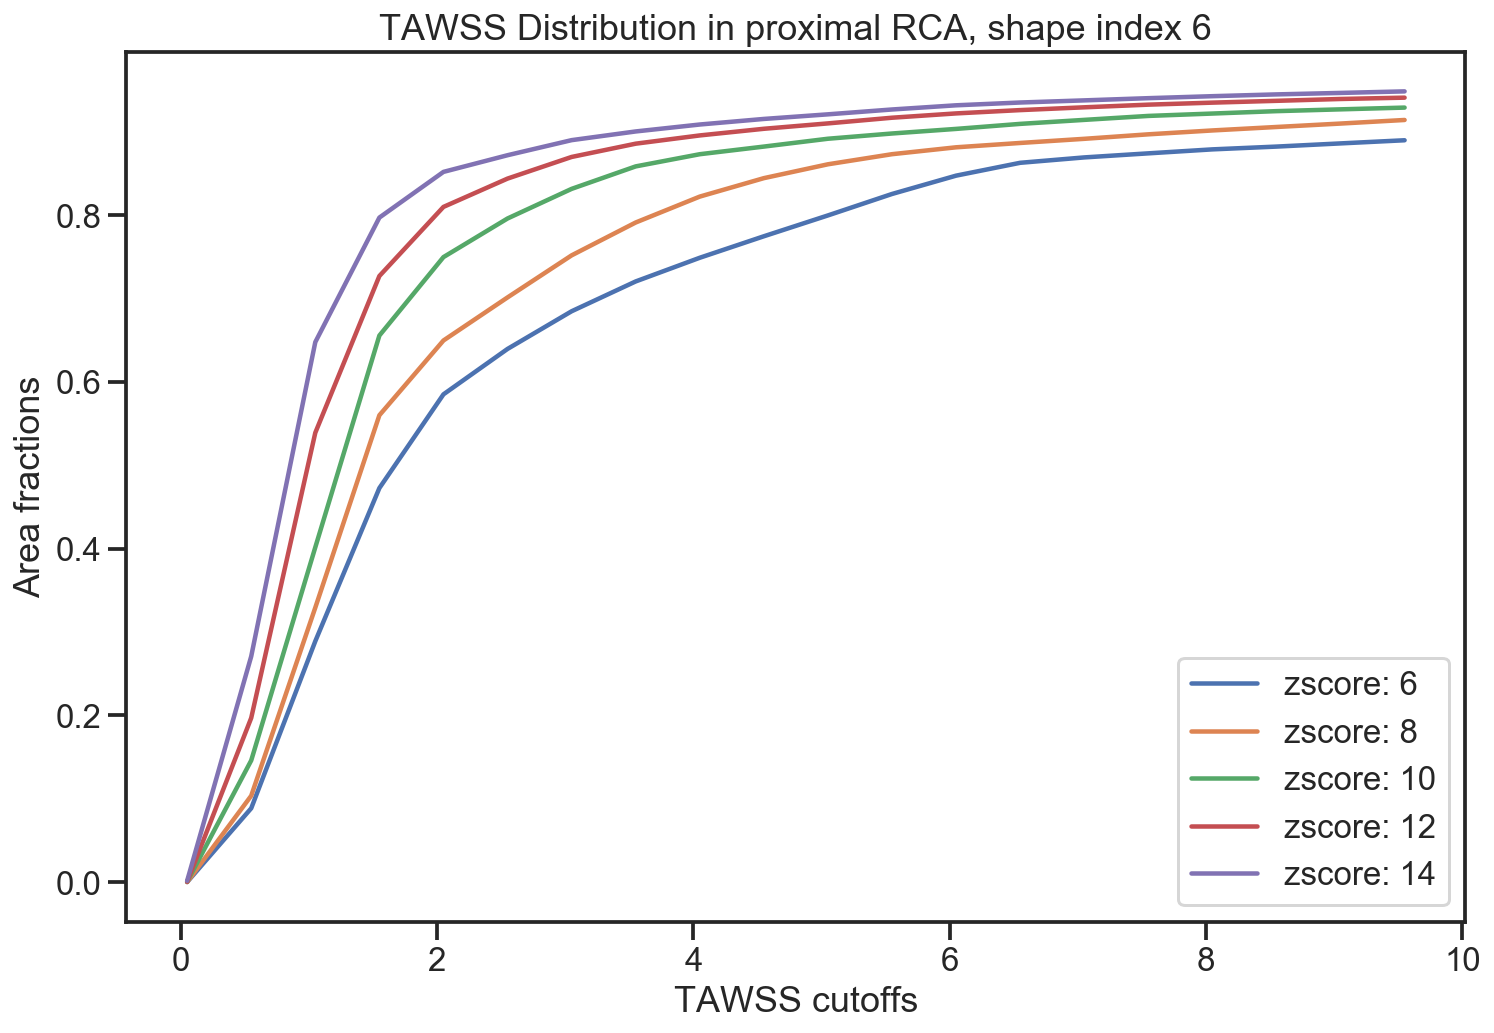

In [7]:
threshold_bounds = np.arange(.05, 10.0, .5)

for shape in shapes: 
    pos_sizes = {'proximal': proximal, 'medial': medial, 'distal': distal}
    if shape == 'ASI6' or shape == 'ASI4': 
        pos_sizes = {'proximal': proximal}
        
    for position, size_list in pos_sizes.iteritems():
        plt.figure(figsize=(12,8))
        for i, size in enumerate(size_list):
            fracs = all_area_fractions_right[shape + '_' + size]
            plt.plot(threshold_bounds, fracs, label='zscore: '+str(z_scores[i]))

        plt.legend()
        plt.title('TAWSS Distribution in ' + position + ' ' + vessel[:-1] + ', shape index ' + shape[-1])
        plt.xlabel('TAWSS cutoffs')
        plt.ylabel('Area fractions')
    

Next, examine the distribution of wall shear stress over the cardiac cycle. 

In [8]:
wss_cycle_rca = read_from_file('WSS_CYCLE_RCA')
vtawss_rca = {}


reading structures from pickle
------------------------------


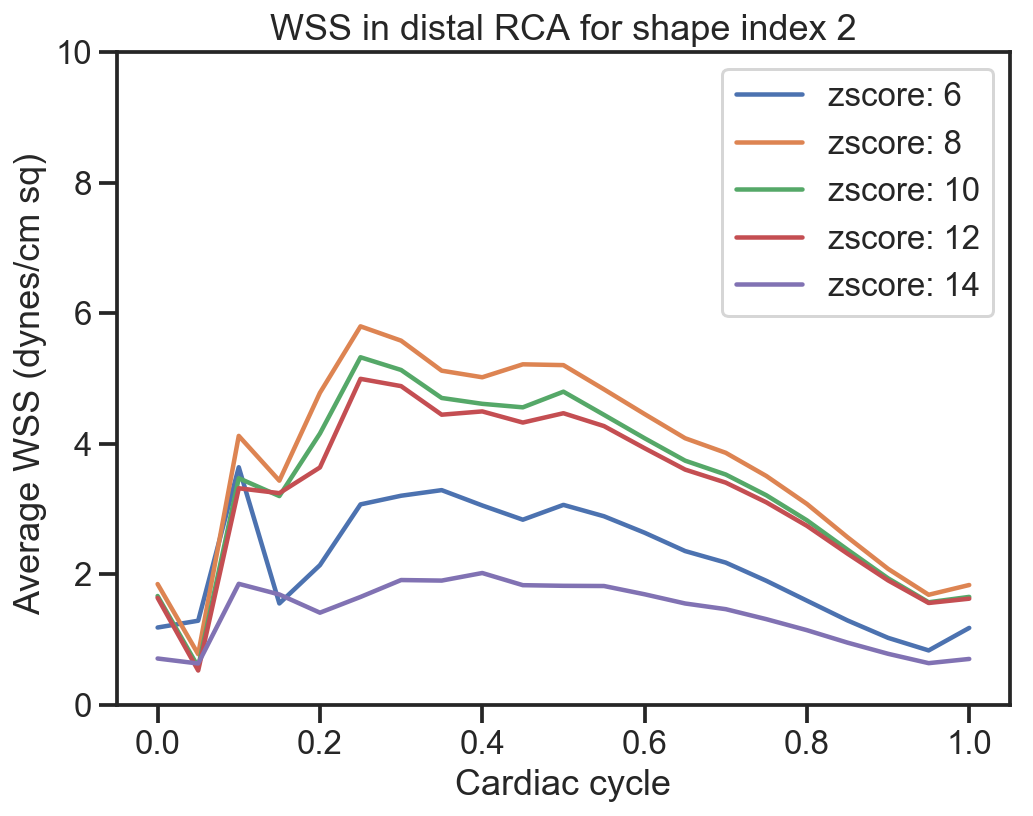

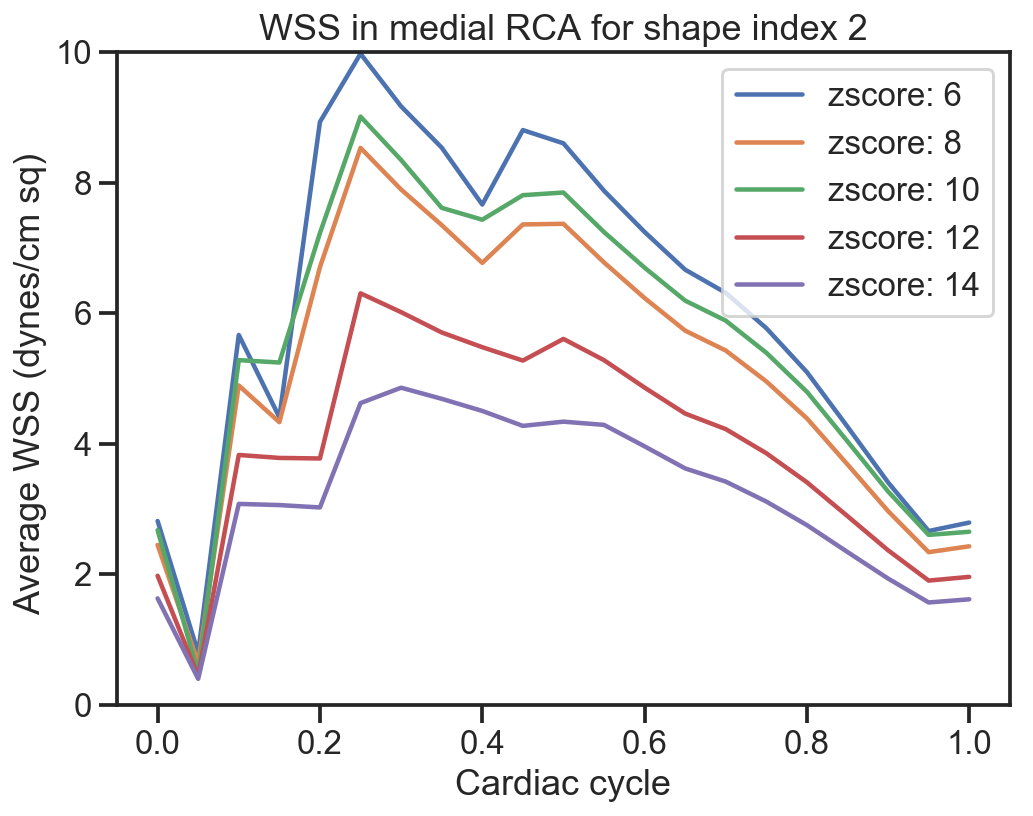

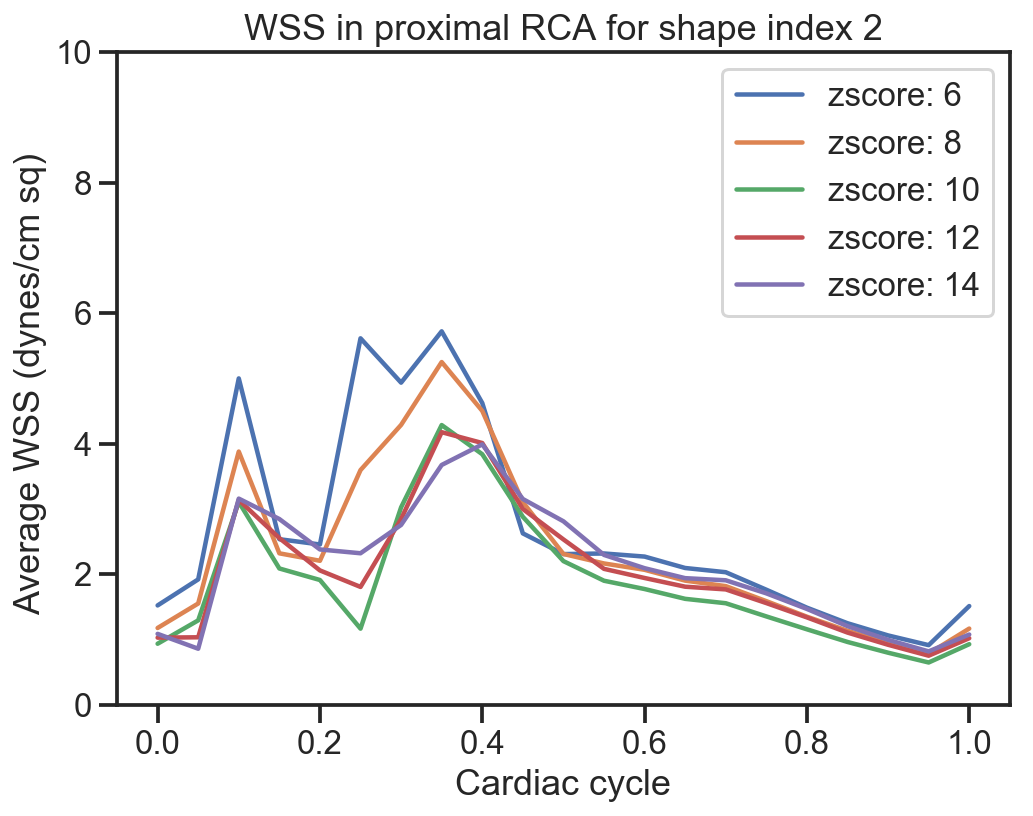

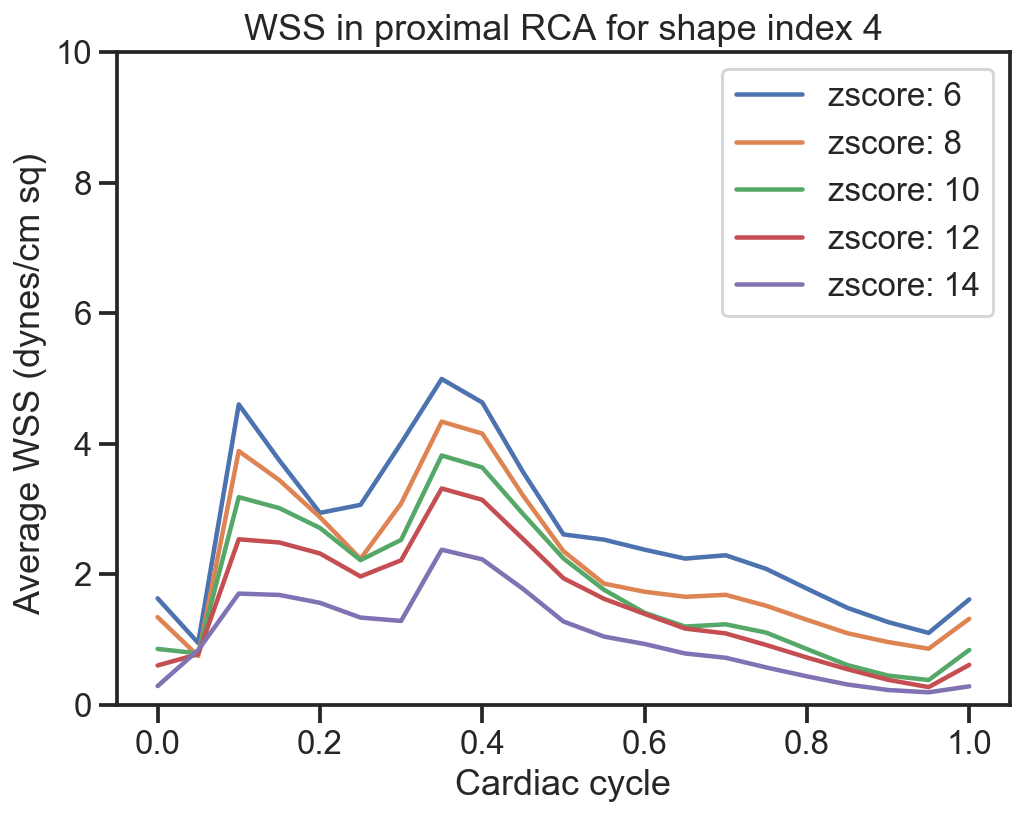

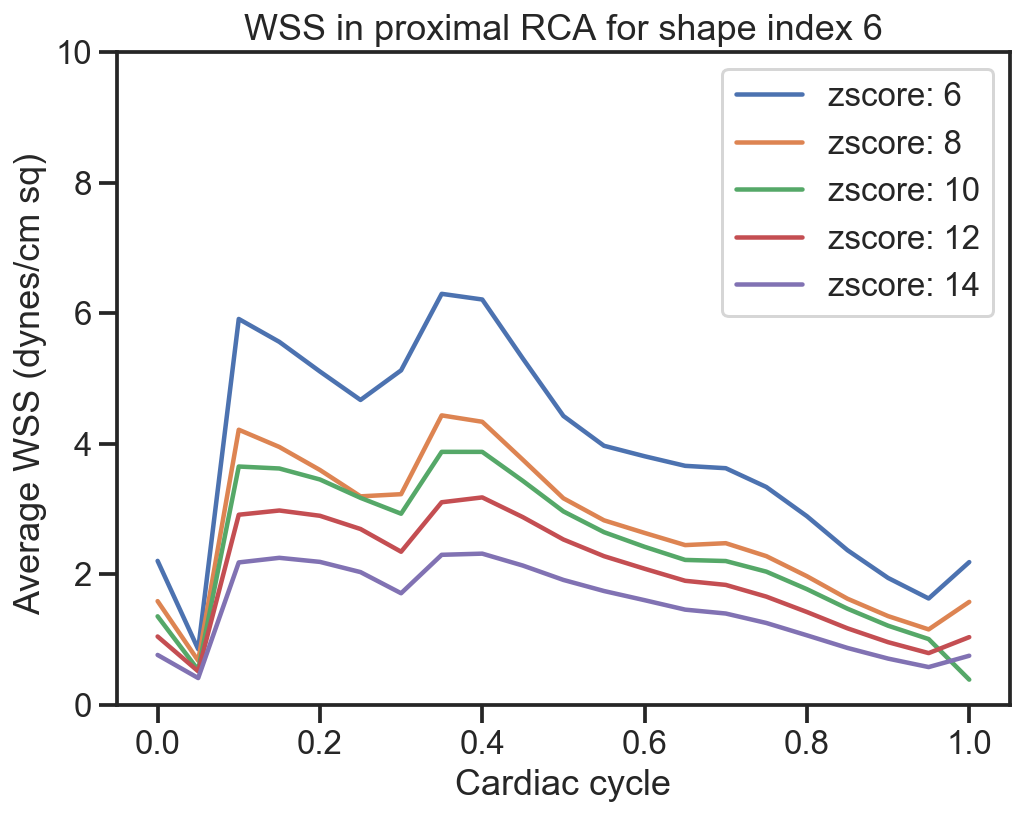

In [9]:
raw_time_steps = np.arange(3000, 4000 + 50, 50)
steps = np.linspace(0.0, 1.0, num=len(raw_time_steps))

for shape in shapes: 
    pos_sizes = {'proximal': proximal, 
                 'medial': medial, 
                 'distal': distal}
    
    if shape == 'ASI6' or shape == 'ASI4': 
        pos_sizes = {'proximal': proximal}
        
    for position, size_list in pos_sizes.iteritems():
        # plt.figure(figsize=(12,12))
        plt.figure(figsize=(8,6))
        for i, size in enumerate(size_list):
            wss, vtawss_rca[shape + '_' + size] = wss_cycle_rca[shape + '_' + size]
            plt.plot(steps, wss, label='zscore: '+str(z_scores[i]))

        plt.legend()
        plt.title('WSS in ' + position + ' ' + vessel[:-1] +' for shape index ' + shape[-1])
        plt.xlabel('Cardiac cycle')
        plt.ylabel('Average WSS (dynes/cm sq) ')
        plt.ylim(0, 10)

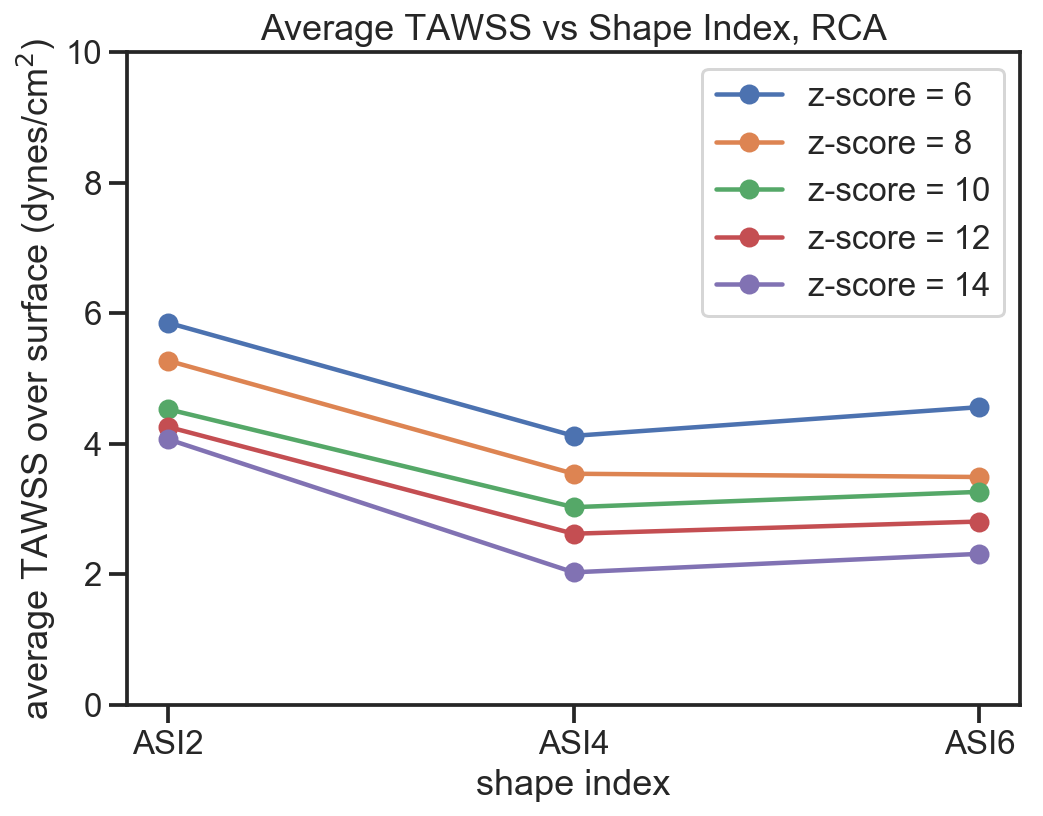

In [10]:
labels = ['prox', 'med', 'dist']
plotted_z_scores = [6, 8, 10, 12, 14]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for k, size in enumerate(proximal):  
    vtawss_surface_averages = np.zeros(len(shapes))
    for c, shape in enumerate(shapes):
        vtawss_surface_averages[c] = vtawss_rca[shape + '_' + size]
    
    ax.plot(shapes, vtawss_surface_averages, label='z-score = ' + str(plotted_z_scores[k]), marker='o')
    
# for k, size in enumerate(medial): 
#     vtawss_surface_averages = np.zeros(len(['ASI2']))
#     vtawss_surface_averages[0]= vtawss_rca['ASI2' + '_' + size]
#     ax.plot(['ASI2'], vtawss_surface_averages, label='med z-score = ' + str(plotted_z_scores[k]), marker='p')
    
# for k, size in enumerate(distal): 
#     vtawss_surface_averages = np.zeros(len(['ASI2']))
#     vtawss_surface_averages[0] = vtawss_rca['ASI2' + '_' + size]
#     ax.plot(['ASI2'], vtawss_surface_averages, label='dist z-score = ' + str(plotted_z_scores[k]), marker='s')
    
# plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.legend()
plt.xlabel('shape index')
plt.ylabel(r'average TAWSS over surface (dynes/cm$^2$)')
plt.title('Average TAWSS vs Shape Index, ' + vessel[:-1] )
plt.ylim(0, 10)
plt.show()


In [11]:
print all_area_fractions_right

{'ASI2_m4': array([3.72162525e-04, 1.14124288e-01, 3.06686455e-01, 4.06008104e-01,
       4.87070721e-01, 5.51253026e-01, 5.90609589e-01, 6.22333537e-01,
       6.47313816e-01, 6.71925232e-01, 6.88699539e-01, 7.01141705e-01,
       7.15657352e-01, 7.29772870e-01, 7.41783178e-01, 7.51545708e-01,
       7.59493055e-01, 7.68537314e-01, 7.78094394e-01, 7.85667314e-01]), 'ASI2_m5': array([0.00084155, 0.14348627, 0.34576971, 0.4433132 , 0.54157243,
       0.59535192, 0.63120123, 0.65717592, 0.68363758, 0.70408644,
       0.72015319, 0.73722505, 0.7526097 , 0.76507441, 0.77591412,
       0.78591889, 0.79407512, 0.80417773, 0.81243708, 0.82218168]), 'ASI2_m1': array([0.        , 0.02268436, 0.09832771, 0.2473909 , 0.35214442,
       0.40197653, 0.44269403, 0.47546733, 0.50521035, 0.52674416,
       0.54332047, 0.56329128, 0.5781512 , 0.59586567, 0.61053036,
       0.627053  , 0.63948995, 0.65351283, 0.66773385, 0.67904487]), 'ASI2_m2': array([0.        , 0.04616233, 0.15663001, 0.31738979, 0.4

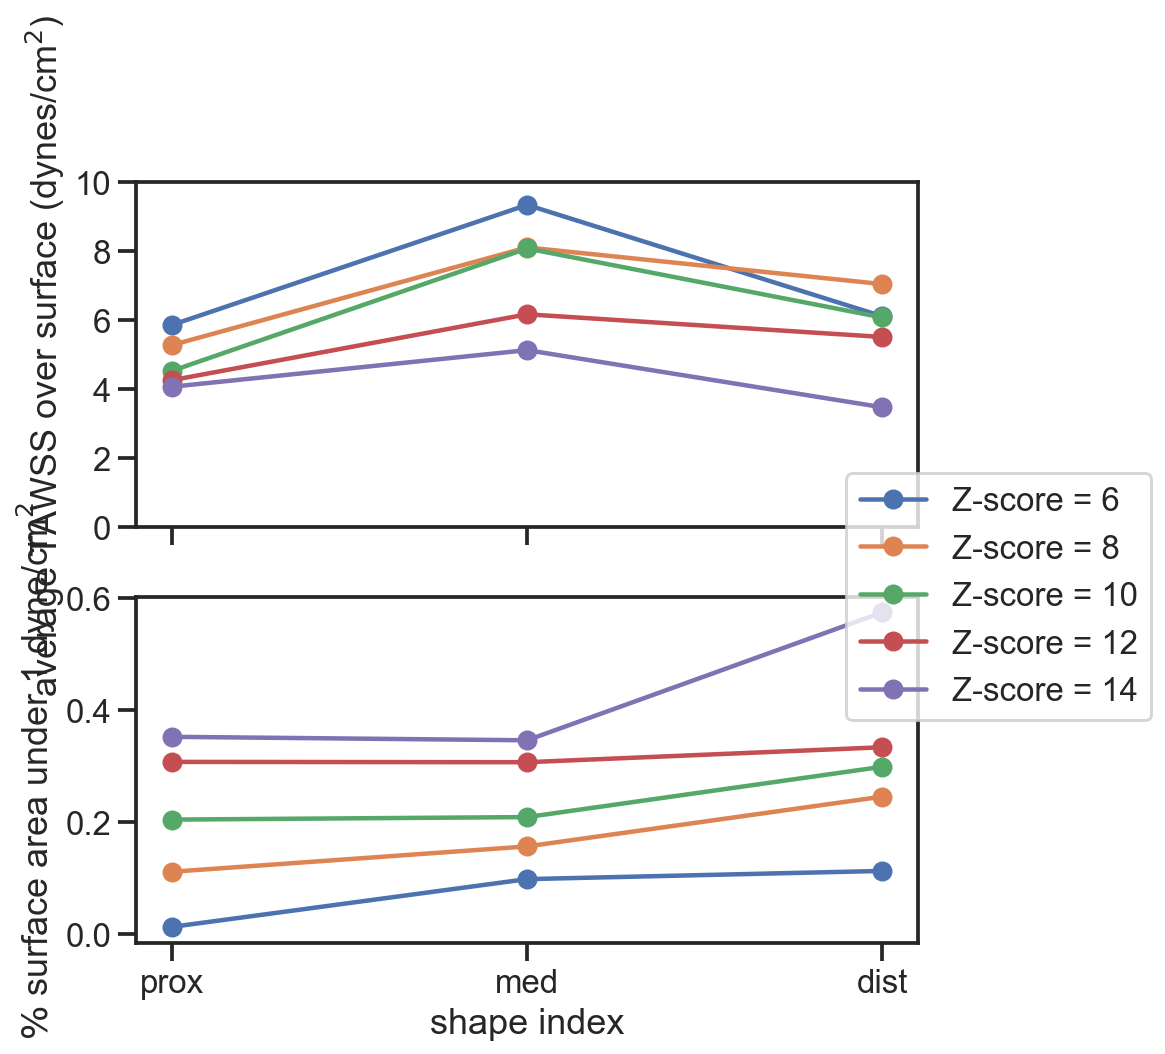

In [12]:
labels = ['prox', 'med', 'dist']
plotted_z_scores = ['6', '8', '10', '12', '14']

cur_asi = 'ASI2'

        
# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)
fig, axs = plt.subplots(2, 1, sharex = True, figsize=(7,7))
ax1, ax2 = axs
vals = np.zeros((len(labels), len(plotted_z_scores), 2))

for i, pos in enumerate([proximal, medial, distal]): 
    for j, (size, z) in enumerate(zip(pos, plotted_z_scores)): 
        vals[i,j,0] = vtawss_rca[cur_asi + '_' + size]
        vals[i,j,1] = all_area_fractions_right[cur_asi + '_' + size][2]


for i, z in enumerate(plotted_z_scores): 
    ax1.plot(labels, vals[:,i,0], label='Z-score = ' + str(z), marker='o')
    ax2.plot(labels, vals[:,i,1], label='Z-score = ' + str(z), marker='o')


plt.legend(loc='right', bbox_to_anchor=(1.32,1))
plt.xlabel('shape index')
ax1.set_ylabel(r'average TAWSS over surface (dynes/cm$^2$)')
ax2.set_ylabel(r'$\%$ surface area under 1 dyne/cm$^2$')
# plt.title('Average TAWSS vs Position, ' + vessel[:-1] )
ax1.set_ylim(0, 10)
plt.show()

In [13]:
osi_areas_rca = read_from_file('OSI_THRESHOLD_AREA_RCA')
osi_rca = {}

reading structures from pickle
------------------------------


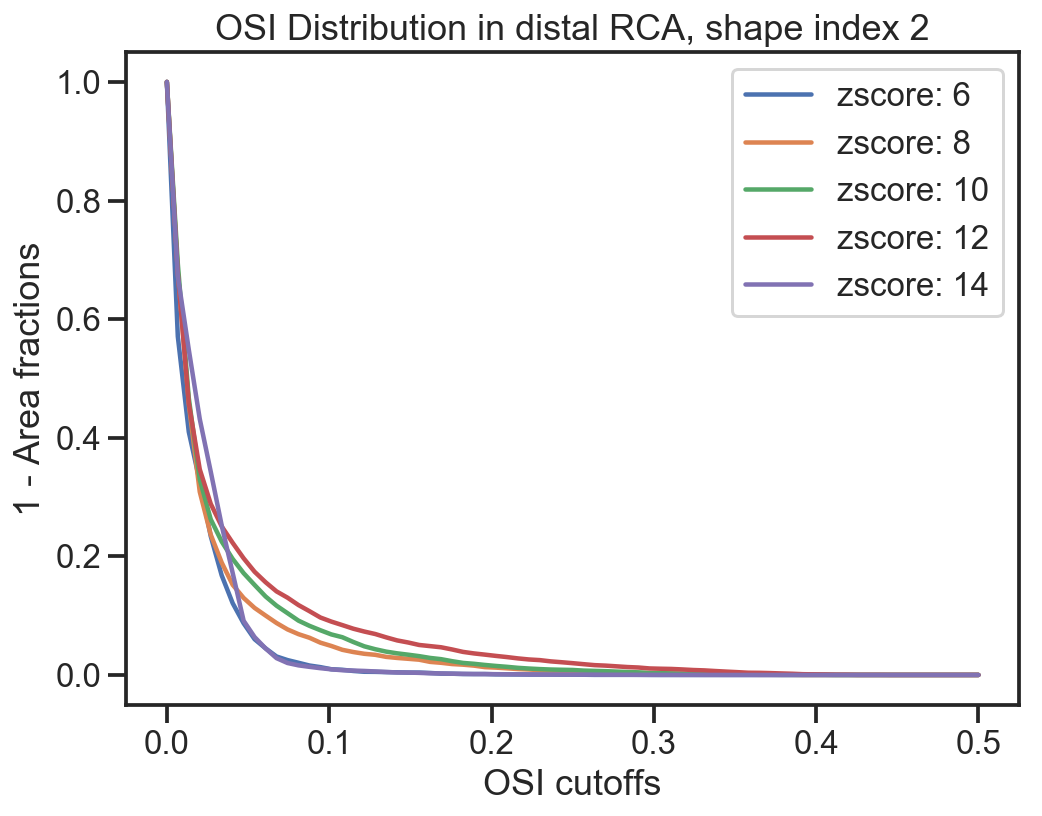

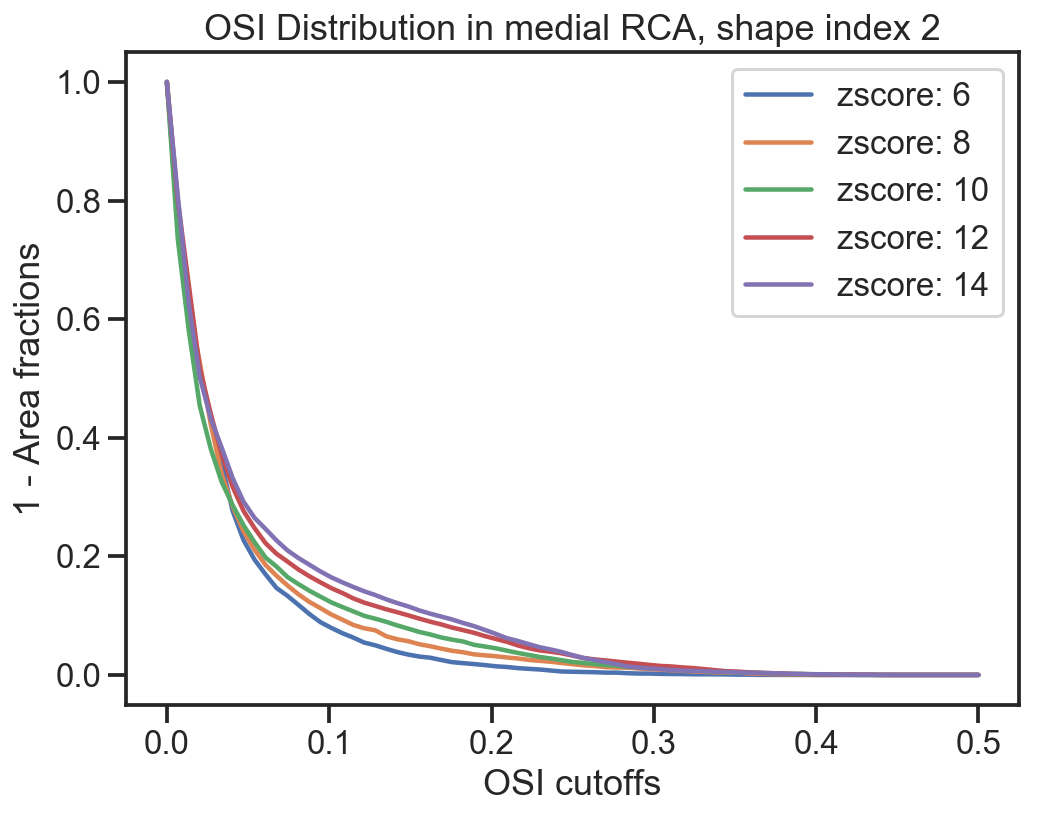

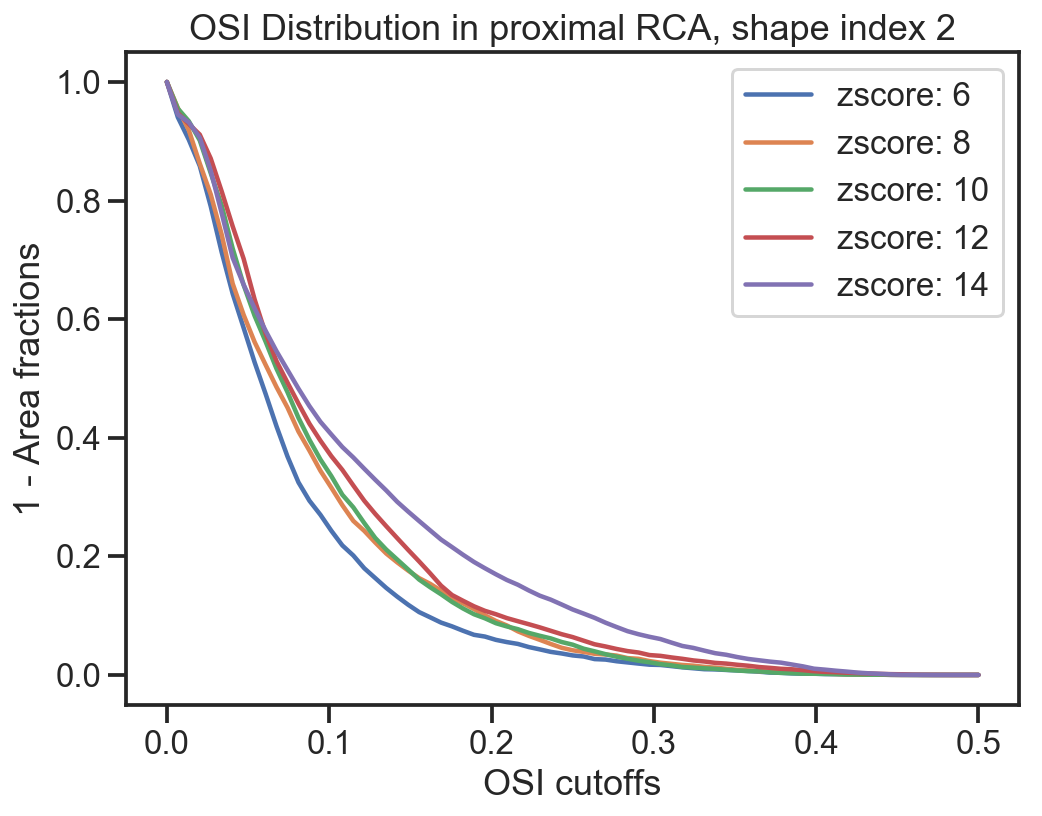

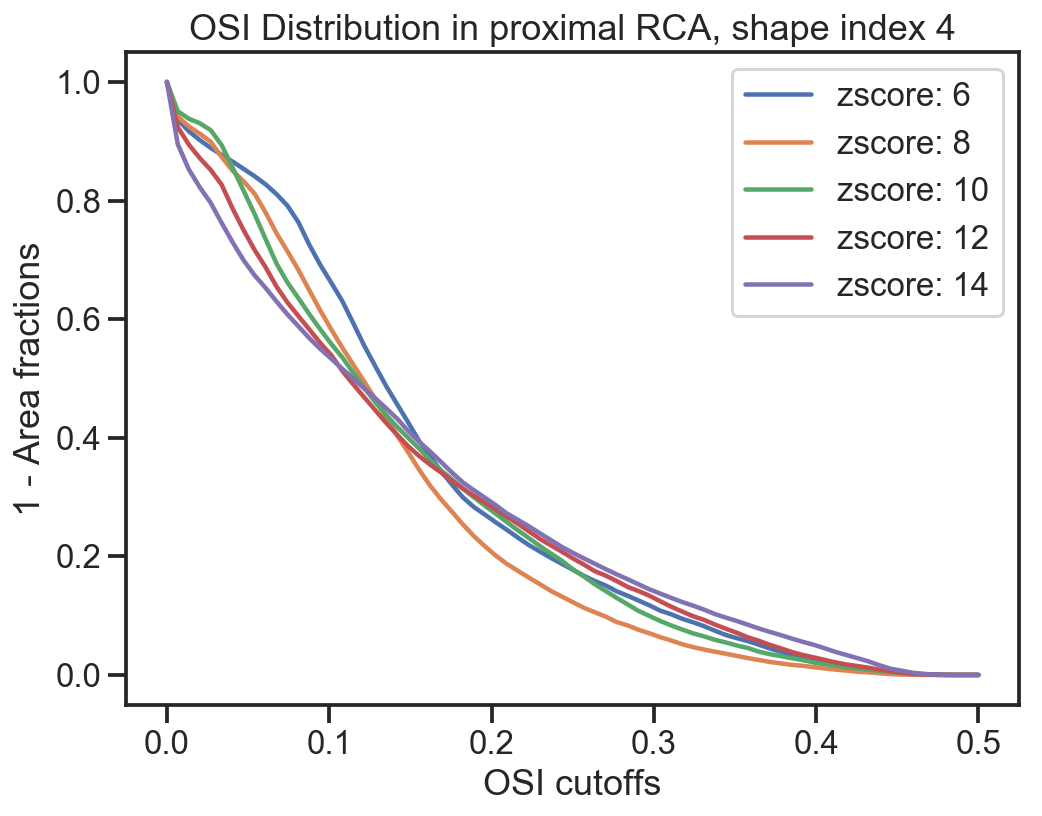

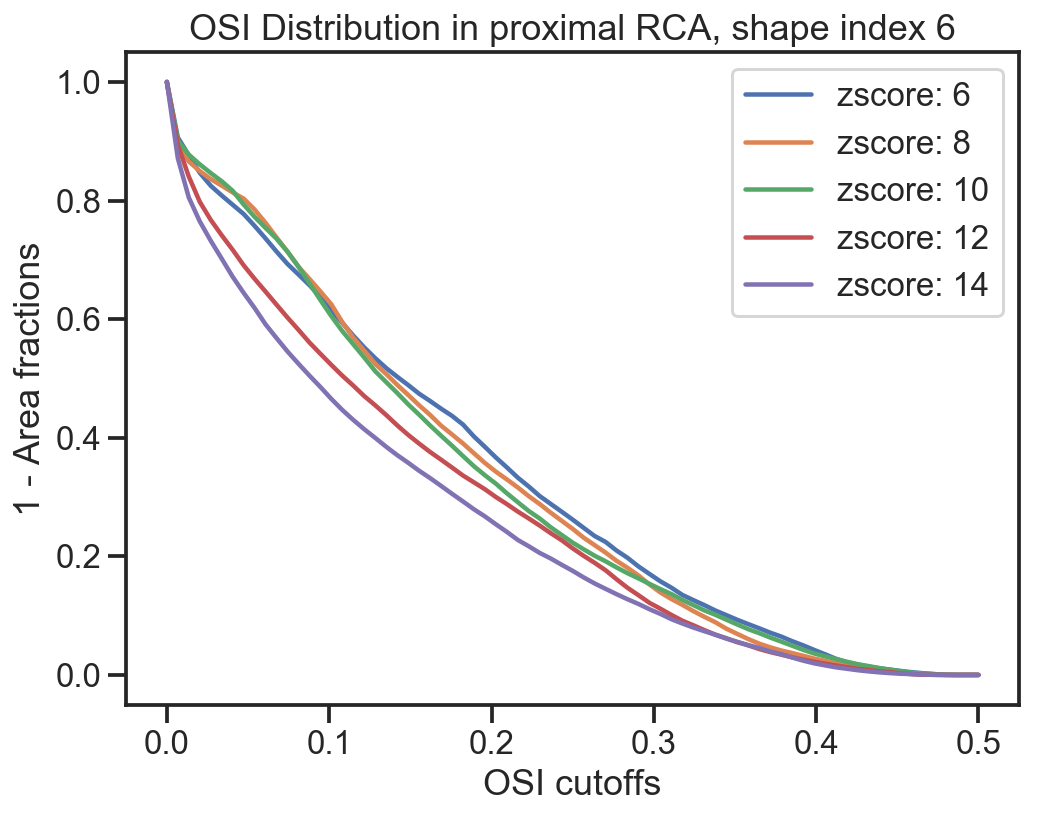

In [14]:
threshold_bounds = np.linspace(0, .5, num=75)

for shape in shapes: 
    pos_sizes = {'proximal': proximal, 'medial': medial, 'distal': distal}
    if shape == 'ASI6' or shape == 'ASI4': 
        pos_sizes = {'proximal': proximal}
        
    for position, size_list in pos_sizes.iteritems():
        plt.figure(figsize=(8,6))
        for i, size in enumerate(size_list):
            fracs = osi_areas_rca[shape + '_' + size]
            plt.plot(threshold_bounds, fracs, label='zscore: '+str(z_scores[i]))

        plt.legend()
        plt.title('OSI Distribution in ' + position + ' ' + vessel[:-1] + ', shape index ' + shape[-1])
        plt.xlabel('OSI cutoffs')
        plt.ylabel('1 - Area fractions')

### Moving onto the left side. 

In [15]:
vessel = 'LAD/'
shapes = ['ASI2', 'ASI4', 'ASI6']
z_scores = [6, 8, 10, 12, 14]
left_positions = ['lad1', 'lad2', 'lad3', 'lad4', 'lad5']

In [16]:
all_area_fractions_lad = read_from_file('WSS_THRESHOLD_AREA_LAD')

reading structures from pickle
------------------------------


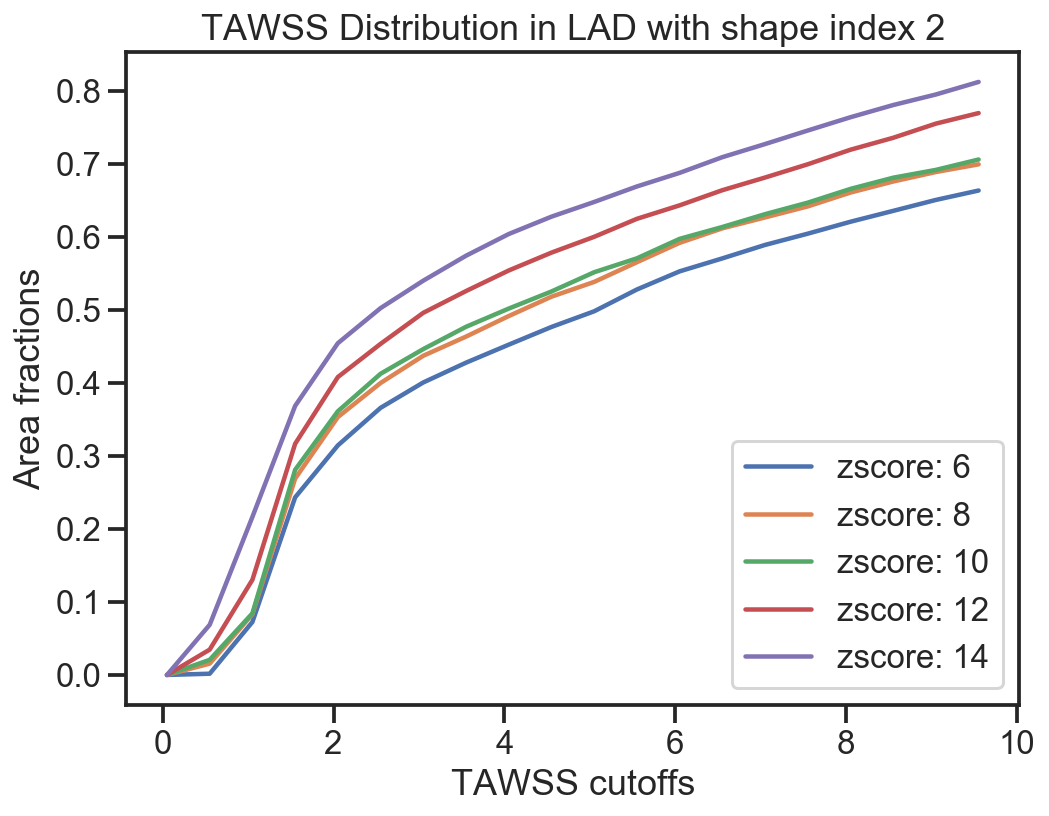

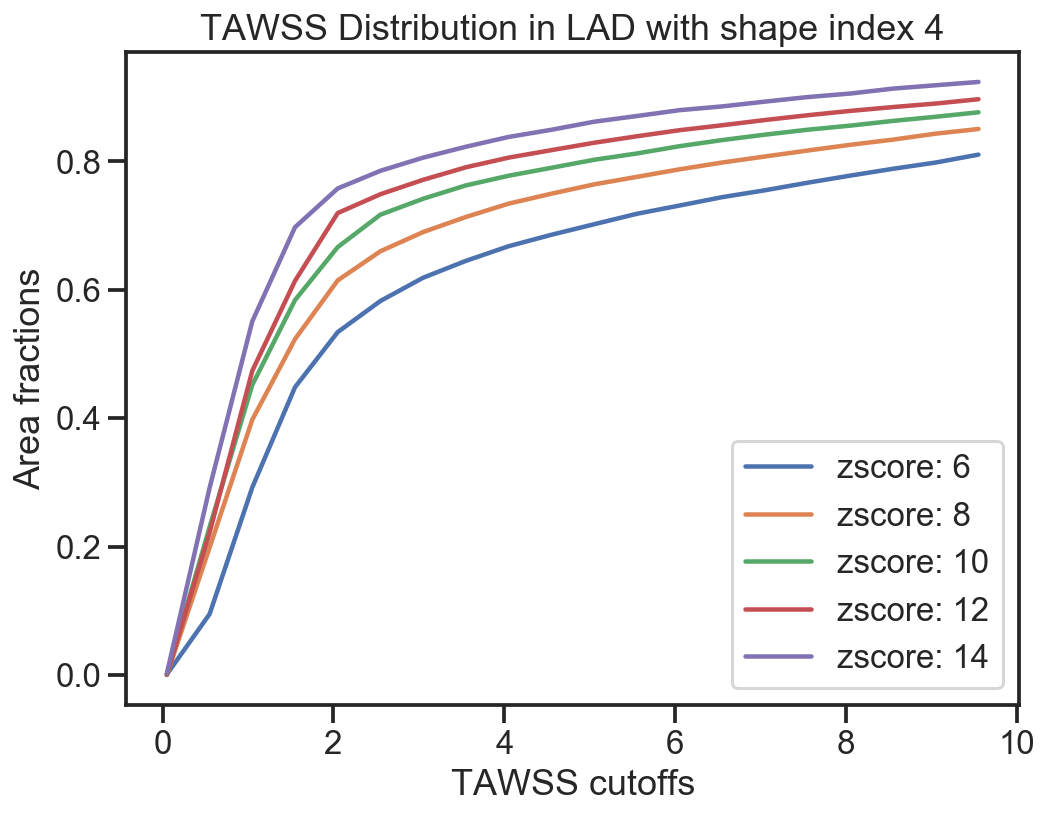

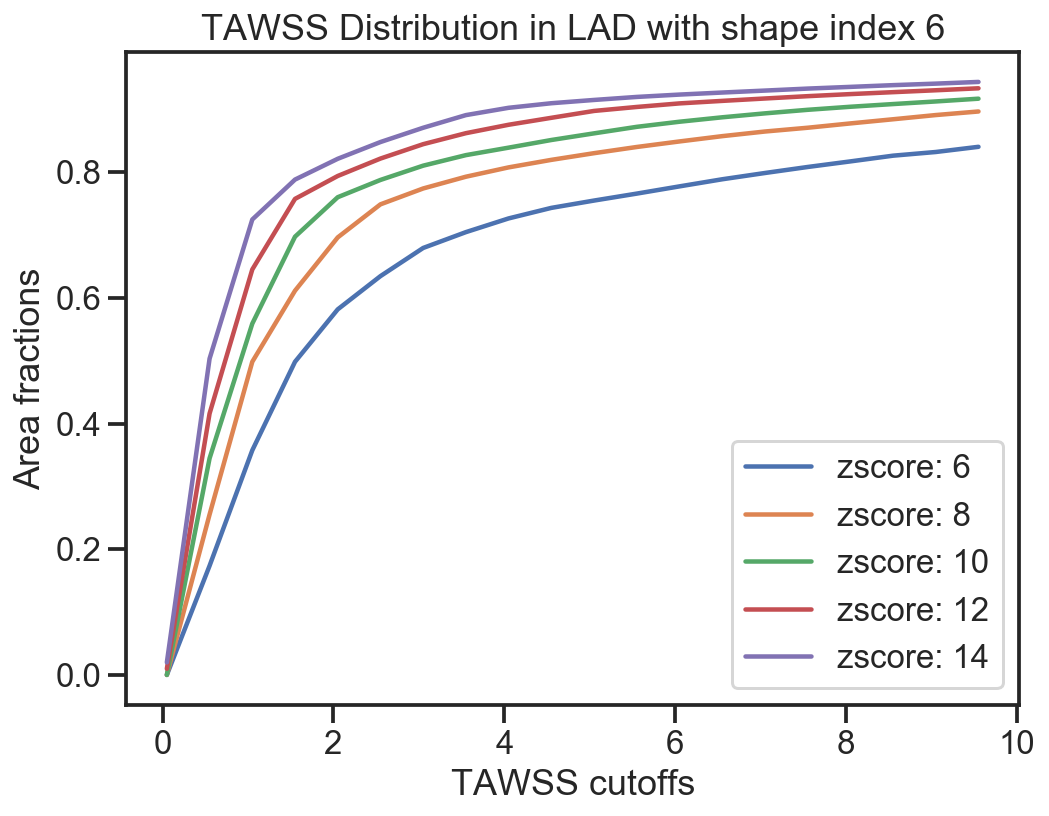

In [17]:
threshold_bounds = np.arange(.05, 10.0, .5)

for shape in shapes: 
    pos_sizes = {'LAD': ['lad1', 'lad2', 'lad3','lad4','lad5']}
    # if shape == 'ASI6': pos_sizes = {'LAD': ['lad2', 'lad3','lad4','lad5']}
        
    for position, size_list in pos_sizes.iteritems():
        # plt.figure(figsize=(12,12))
        plt.figure(figsize=(8,6))
        for i, size in enumerate(size_list):
            fracs = all_area_fractions_lad[shape + '_' + size]
            plt.plot(threshold_bounds, fracs, label='zscore: '+str(z_scores[i]))

        plt.legend()
        plt.title('TAWSS Distribution in ' + vessel[:-1] + ' with shape index ' + shape[-1])
        plt.xlabel('TAWSS cutoffs')
        plt.ylabel('Area fractions')

In [18]:
wss_cycle_lad = read_from_file('WSS_CYCLE_LAD')
vtawss_lad = {}

reading structures from pickle
------------------------------


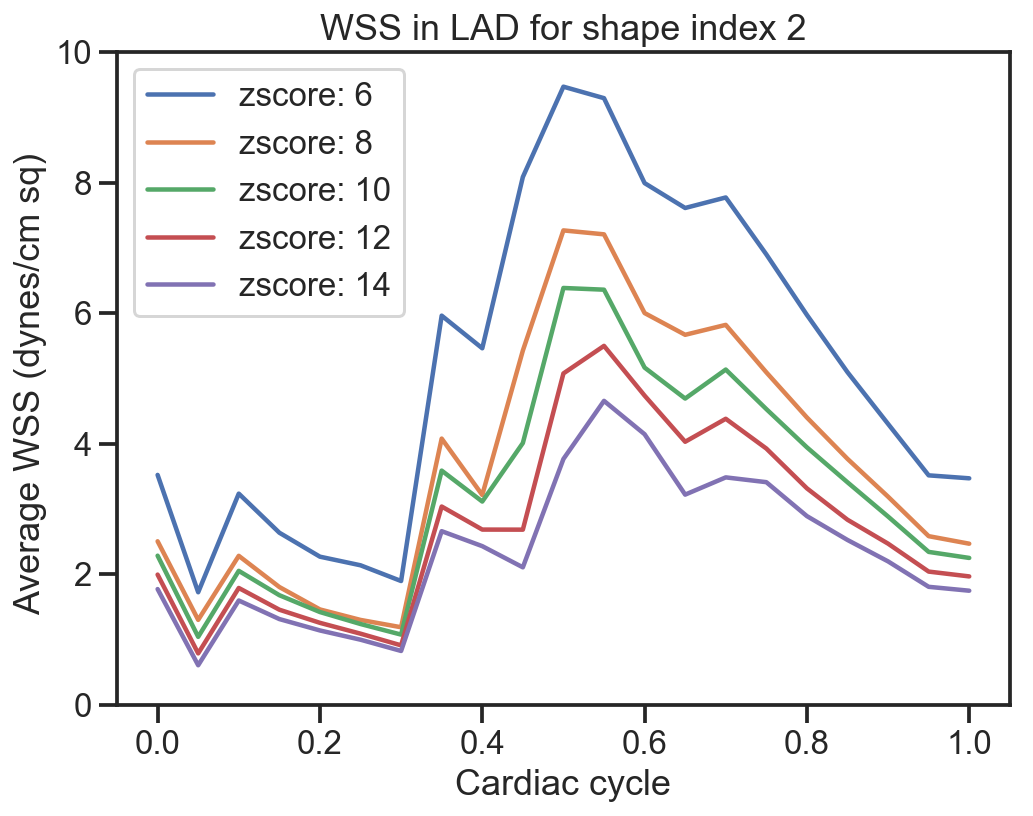

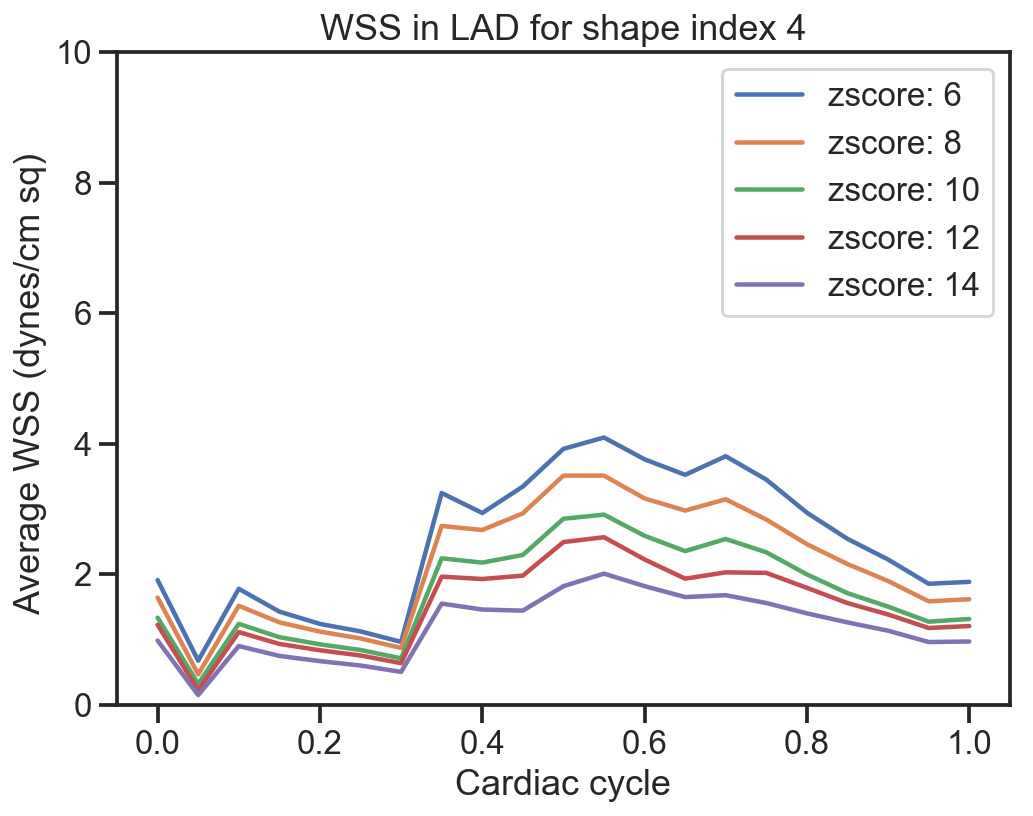

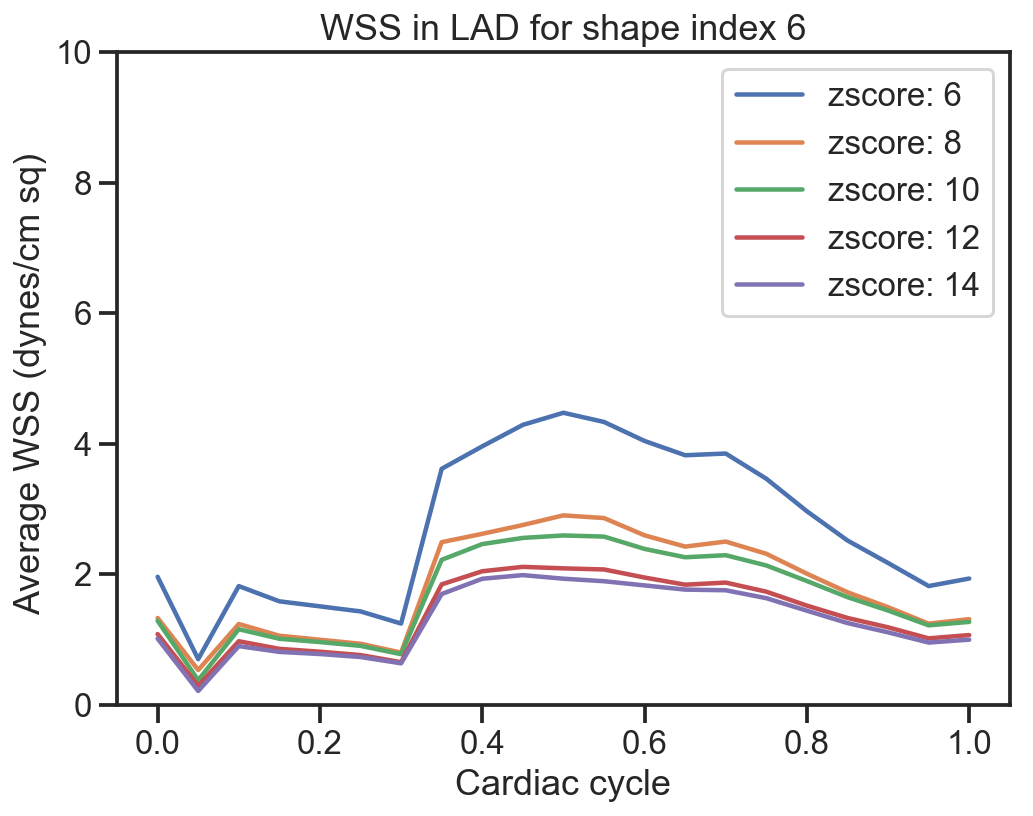

In [19]:
raw_time_steps = np.arange(3000, 4000 + 50, 50)
steps = np.linspace(0.0, 1.0, num=len(raw_time_steps))

for shape in shapes: 
    pos_sizes = {'LAD': ['lad1', 'lad2', 'lad3','lad4','lad5']}
        
    for position, size_list in pos_sizes.iteritems():
        # plt.figure(figsize=(12,12))
        plt.figure(figsize=(8,6))
        for i, size in enumerate(size_list):
            wss, vtawss_lad[shape + '_' + size] = wss_cycle_lad[shape + '_' + size]
            plt.plot(steps, wss, label='zscore: '+str(z_scores[i]))

        plt.legend()
        plt.title('WSS in ' + vessel[:-1] + ' for shape index ' + shape[-1])
        plt.xlabel('Cardiac cycle')
        plt.ylabel('Average WSS (dynes/cm sq) ')
        plt.ylim(0, 10)

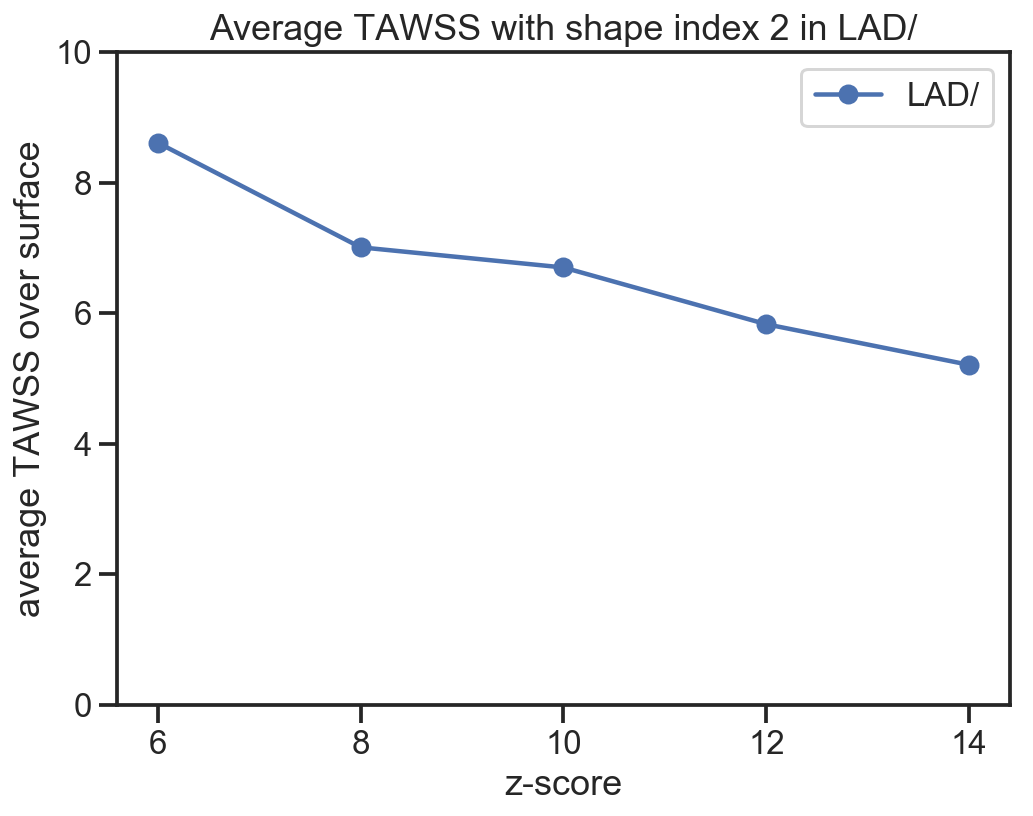

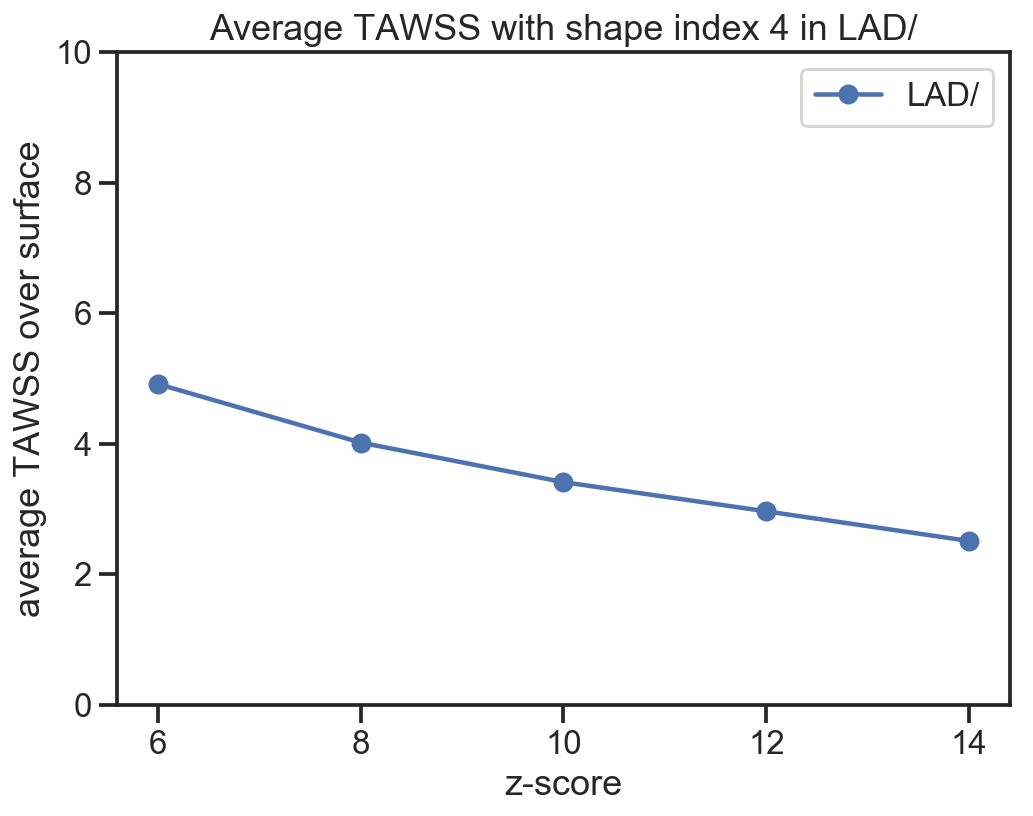

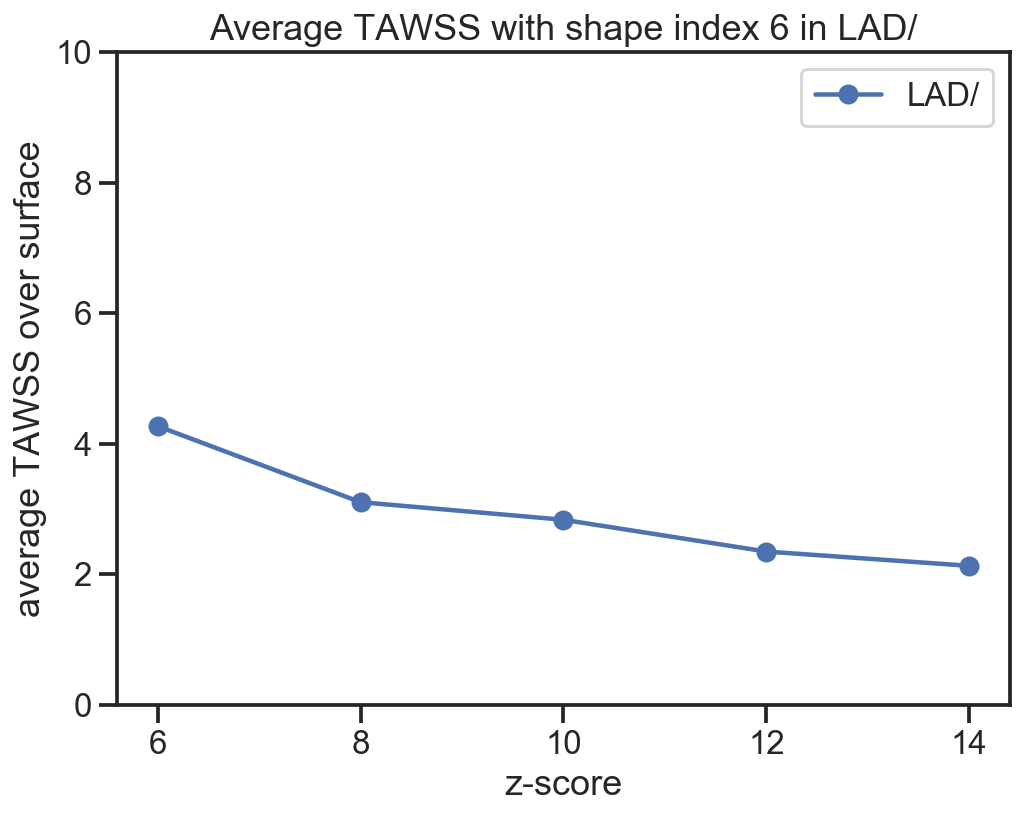

In [20]:
for shape in shapes: 
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    loc_set = left_positions
    vtawss_surface_averages = np.zeros(len(loc_set))
    for k, size in enumerate(loc_set):
        vtawss_surface_averages[k] = vtawss_lad[shape + '_' + size]

    ax.plot(z_scores, vtawss_surface_averages, label=vessel, marker='o')
    plt.legend()
    plt.xlabel('z-score')
    plt.ylabel('average TAWSS over surface')
    plt.title('Average TAWSS with shape index ' + shape[-1] + ' in ' + vessel)
    plt.ylim(0, 10)
    ax.set_xticks(z_scores)

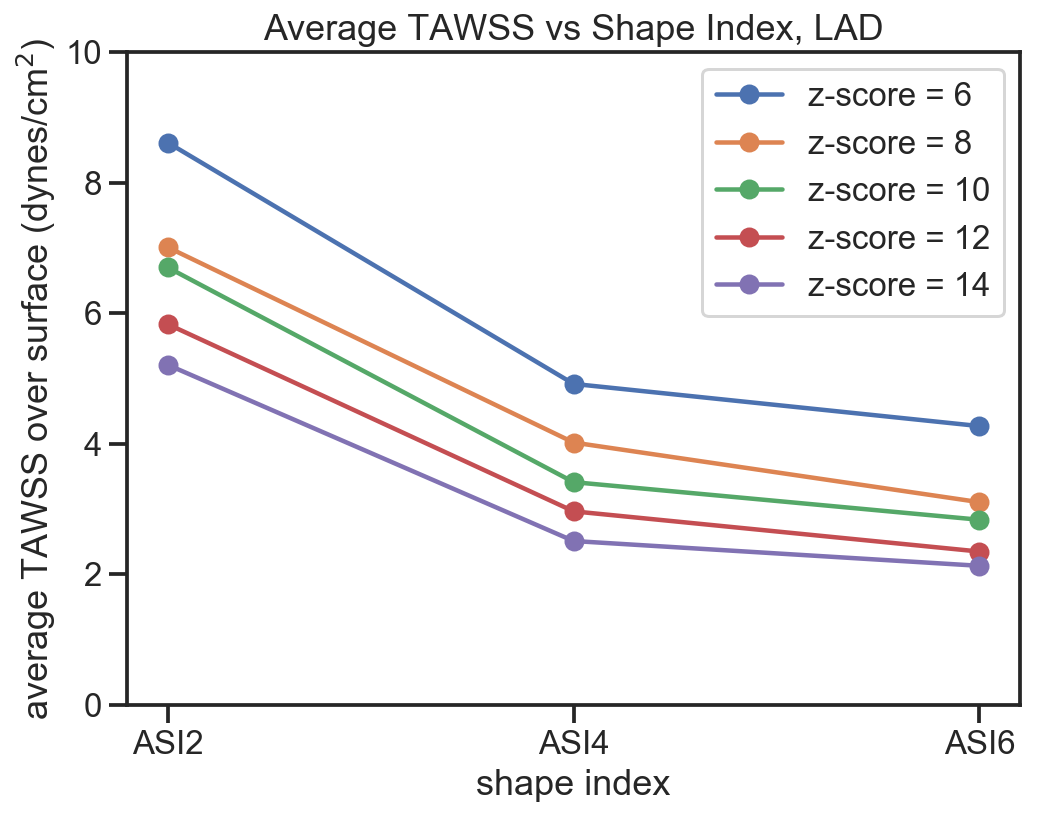

In [21]:
plotted_z_scores = [6, 8, 10, 12, 14]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for k, size in enumerate(left_positions):  
    vtawss_surface_averages = np.zeros(len(shapes))
    for c, shape in enumerate(shapes):
        vtawss_surface_averages[c] = vtawss_lad[shape + '_' + size]
    
    ax.plot(shapes, vtawss_surface_averages, label='z-score = ' + str(plotted_z_scores[k]), marker='o')
    
plt.legend()
plt.xlabel('shape index')
plt.ylabel(r'average TAWSS over surface (dynes/cm$^2$)')
plt.title('Average TAWSS vs Shape Index, ' +  vessel[:-1] )
plt.ylim(0, 10)
plt.show()

In [22]:
osi_areas_lad = read_from_file('OSI_THRESHOLD_AREA_LAD')
osi_lad = {}

reading structures from pickle
------------------------------


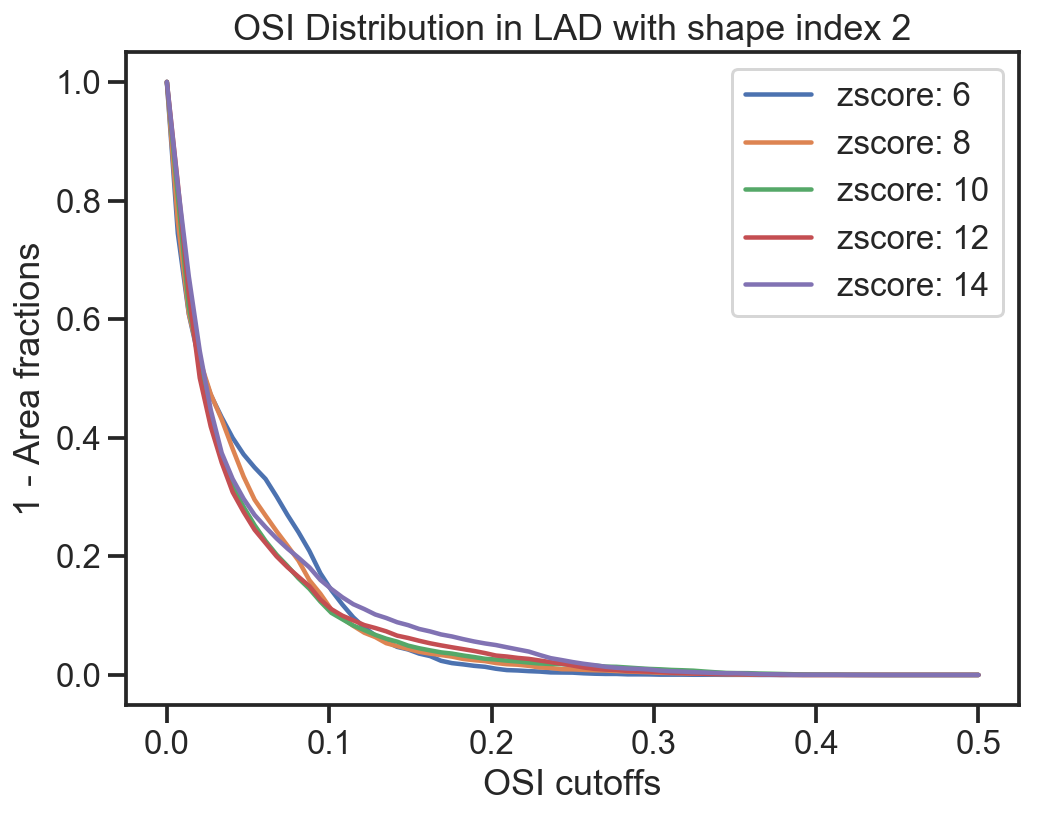

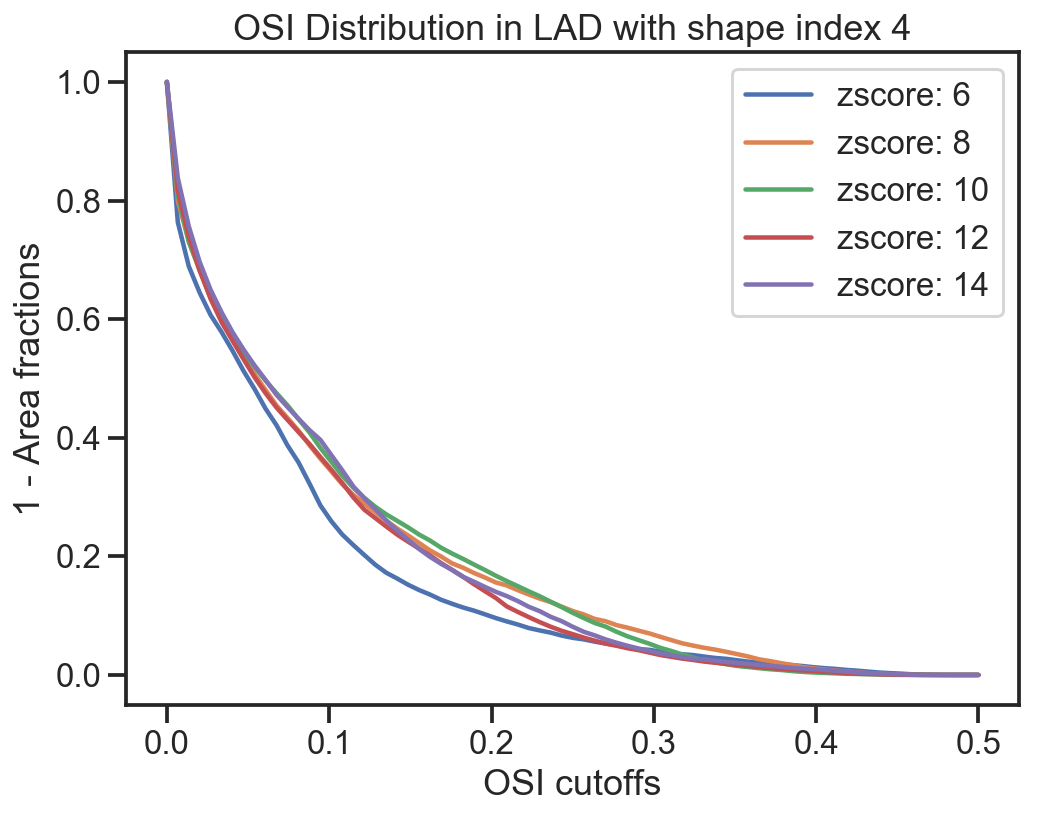

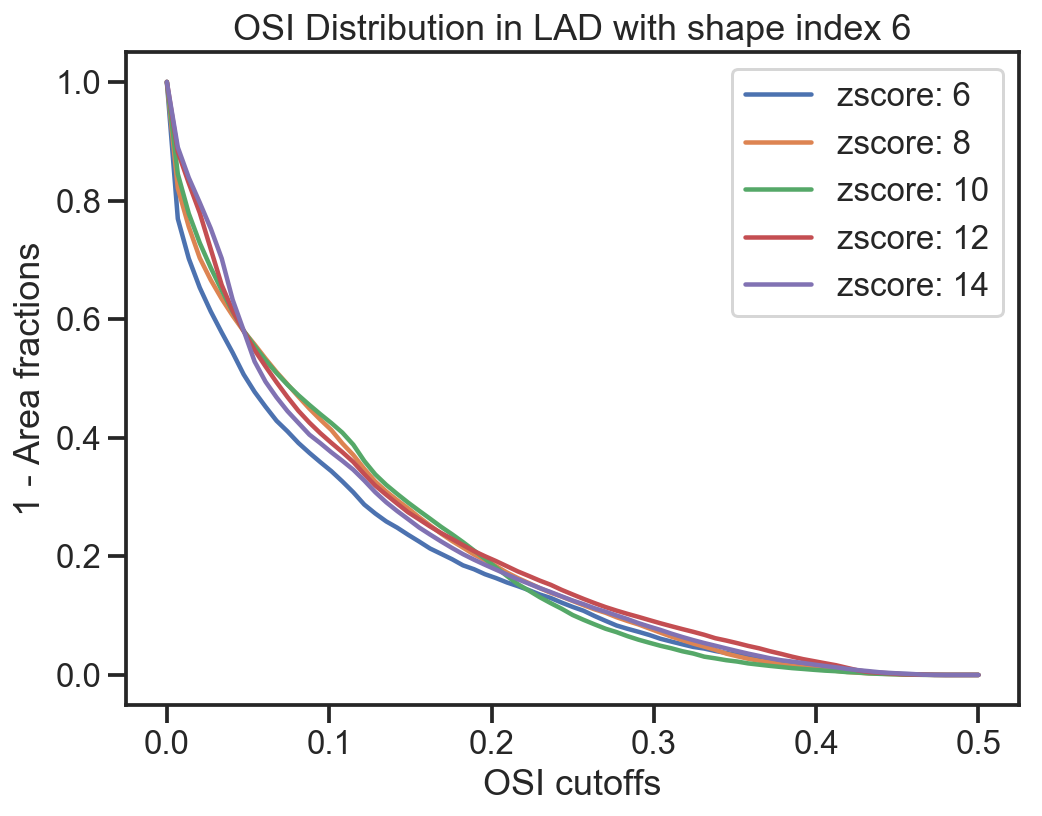

In [23]:
threshold_bounds = np.linspace(0, .5, num=75)

for shape in shapes: 
    pos_sizes = {'LAD': ['lad1', 'lad2', 'lad3','lad4','lad5']}
    # if shape == 'ASI6': pos_sizes = {'LAD': ['lad2', 'lad3','lad4','lad5']}
        
    for position, size_list in pos_sizes.iteritems():
        # plt.figure(figsize=(12,12))
        plt.figure(figsize=(8,6))
        for i, size in enumerate(size_list):
            fracs = osi_areas_lad[shape + '_' + size]
            plt.plot(threshold_bounds, fracs, label='zscore: '+str(z_scores[i]))

        plt.legend()
        plt.title('OSI Distribution in ' + vessel[:-1] + ' with shape index ' + shape[-1])
        plt.xlabel('OSI cutoffs')
        plt.ylabel('1 - Area fractions')
  

#### Summary of average TAWSS with respect to z-score for each shape index

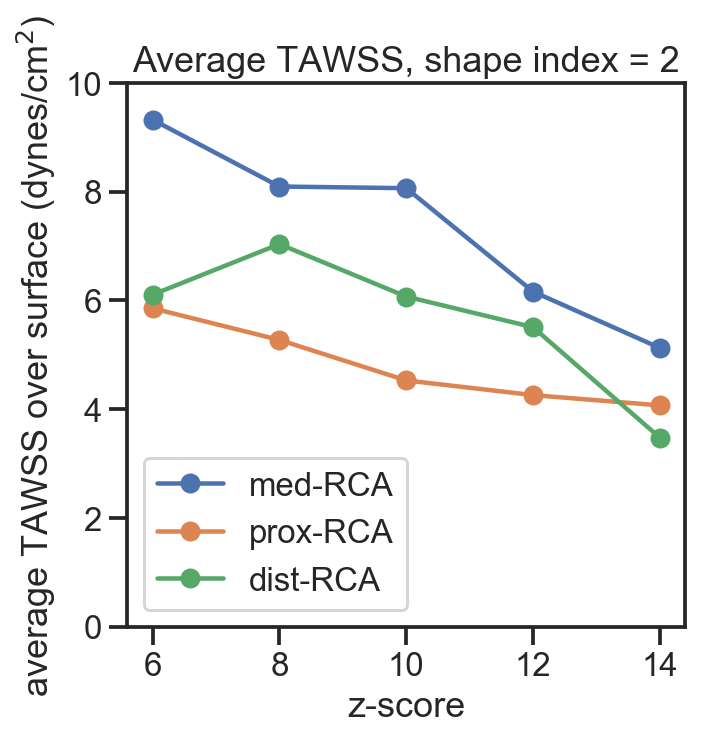

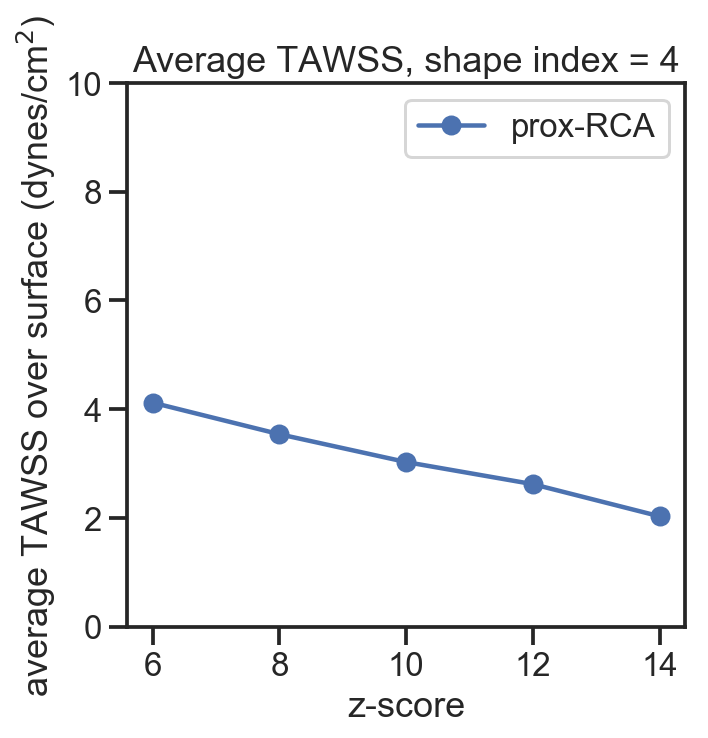

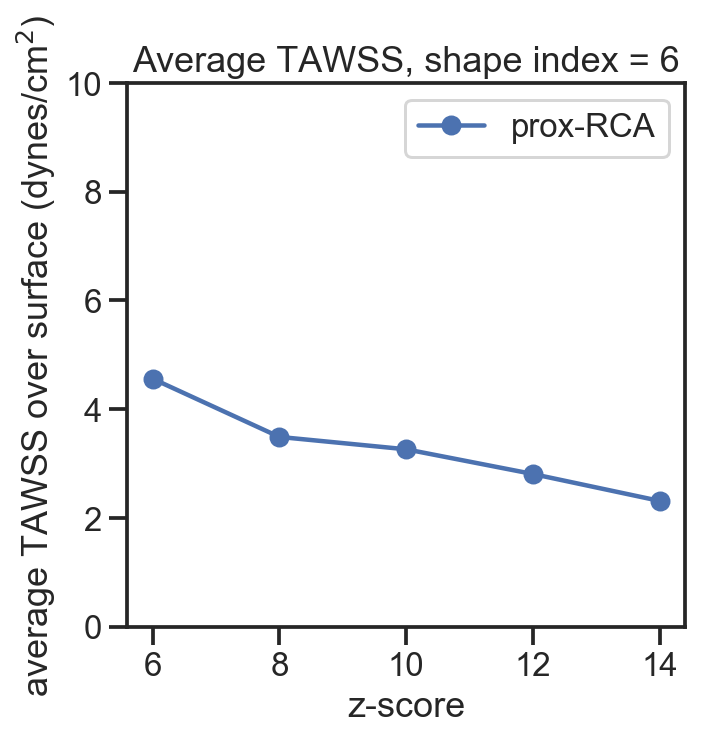

In [24]:
labels = {'prox-RCA': proximal, 
          'med-RCA': medial, 
          'dist-RCA': distal,
          #'prox-LAD': left
         }

for shape in shapes: 
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(1, 1, 1)
    
    for label, location_sizes in labels.iteritems():
        vtawss_surface_averages = np.zeros(len(location_sizes))
        for c, size in enumerate(location_sizes):
            source = vtawss_rca if 'RCA'in label else vtawss_lad
            
            try:
                vtawss_surface_averages[c] = source[shape + '_' + size]
            except:
                continue
        
        if not np.any(vtawss_surface_averages): continue
        ax.plot(z_scores, vtawss_surface_averages, label=label, marker='o')
        
    plt.legend()
    plt.xlabel('z-score')
    plt.ylabel(r'average TAWSS over surface (dynes/cm$^2$)')
    plt.title('Average TAWSS, shape index = ' + shape[-1] )
    plt.ylim(0, 10)
    ax.set_xticks(z_scores)
            

### ANIMATIONS

Here, we will produce an animation showing the relationship between shape index and fractional area under dynamic WSS cutoff, stratified by aneurysm z-score

In [25]:

# animation_vessel = 'RCA/'
animation_vessel = 'LAD/'
if animation_vessel == 'LAD/': 
    area_fracs = all_area_fractions_lad
    sizes = ['lad1', 'lad2', 'lad3', 'lad4', 'lad5']
else: 
    area_fracs = all_area_fractions_right
    sizes = proximal

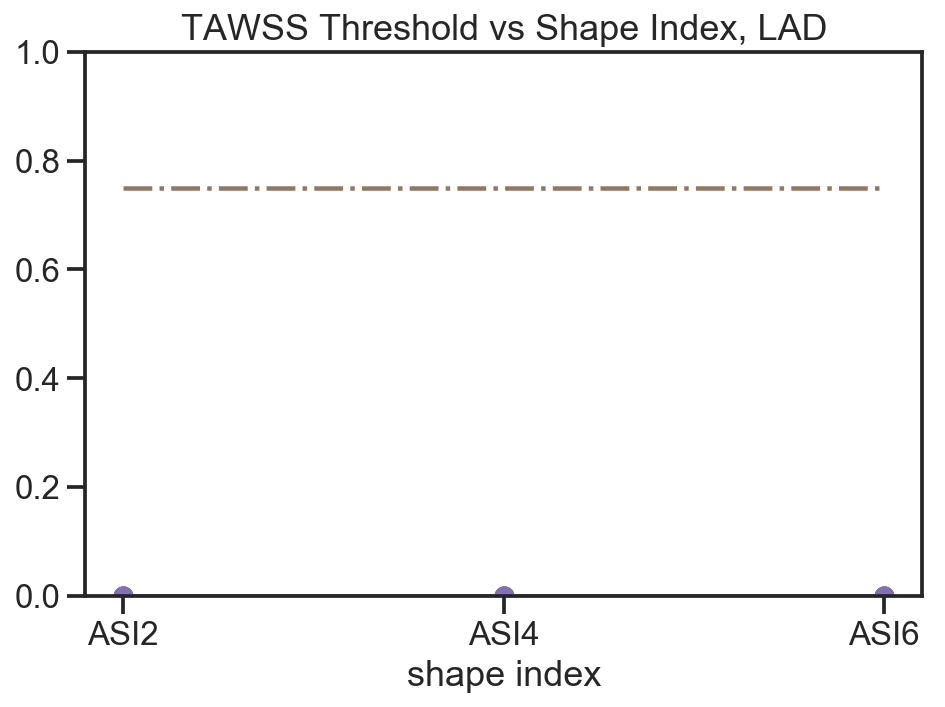

In [26]:
labels = ['prox', 'med', 'dist']
plotted_z_scores = [6, 8, 10, 12, 14]
threshold_bounds = np.arange(.05, 10.0, .5)
plot_idx = 2

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
plt.xlabel('shape index')
plt.title('TAWSS Threshold vs Shape Index, ' + animation_vessel[:-1] )
plt.ylim(0, 1)

# initialize the lines
lines = []
for index in range(len(plotted_z_scores)):
    lobj = ax.plot(shapes,[0, 0, 0],lw=2, marker='o', label='z-score = ' + str(plotted_z_scores[index]))[0]
    lines.append(lobj)

def init(): 
    ax.plot(shapes, [.75, .75, .75], linestyle='-.')
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.75, box.height])
    return lines

def animate(plot_idx): 
    ys =[]
    for k, size in enumerate(sizes):  
        vtawss_sub_threshold_fracs = np.zeros(len(shapes))
        for c, shape in enumerate(shapes):
            vtawss_sub_threshold_fracs[c] = area_fracs[shape + '_' + size][plot_idx]
        ys.append(vtawss_sub_threshold_fracs)
        
    for lnum,line in enumerate(lines):
        line.set_ydata(ys[lnum]) # set data for each line separately. 

    ax.set_ylabel('Fraction of Surface Area Under %.2f'%(threshold_bounds[plot_idx]))

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    return lines
    

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(threshold_bounds), interval=600, blit=True)


In [27]:
HTML(anim.to_jshtml())

Capture specific frames for non-animation visualization

In [28]:
real_clin_threshold_fracs = [0.021552641,
                            0.197127003,
                            0,
                            0.008658212,
                            0.001524033,
                            0.01841449,
                            0,
                            0.010220732,
                            0.038200863,
                            0.492747024,
                            0.18731641,
                            0.127003774,
                            0.103511406,
                            0.315111157,
                            0.6698711,
                            0.799483338,
                            0.688295223]

real_clin_asis = [0.925595431,
                0.865269613,
                0.81143857,
                1.695360514,
                1.888652381,
                1.035256881,
                0.504989282,
                2.906349745,
                1.577721572,
                2.157217122,
                1.905305506,
                3.386546434,
                1.880745211,
                1.645944859,
                1.800550603,
                1.649212011,
                1.994407569]

right_volumes = {
    'ASI2': {'prox':[0.37912, 0.48379, 0.68129, 0.88389, 1.1165],
             'med': [0.2626, 0.40586, 0.58183, 0.80693, 1.0183], 
             'dist': [.19253, 0.30718, .45923, .65179, .89421]}, 
    'ASI4': {'prox':[0.90235, 1.3218, 1.9063, 2.5823, 2.8892]},
    'ASI6': {'prox':[1.4014, 1.4651, 2.109, 2.9514, 4.0107]},
}


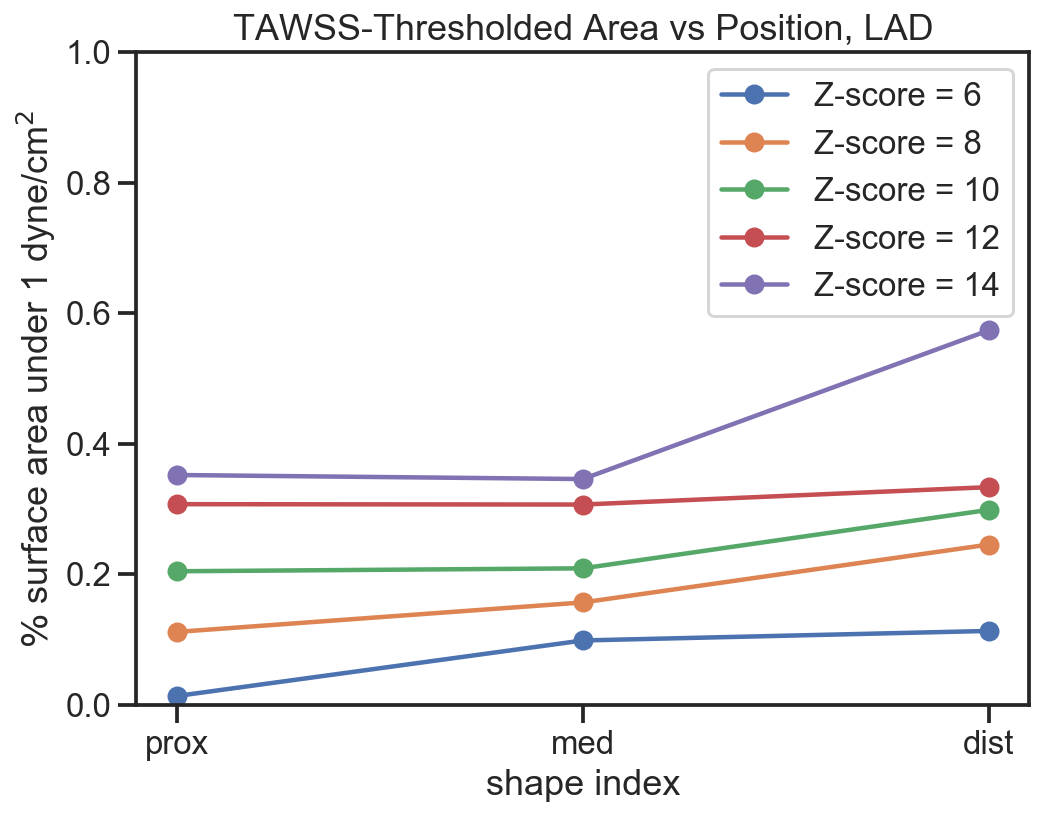

In [29]:
labels = ['prox', 'med', 'dist']
plotted_z_scores = ['6', '8', '10', '12', '14']

cur_asi = 'ASI2'

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

vals = np.zeros((len(labels), len(plotted_z_scores)))

for i, pos in enumerate([proximal, medial, distal]): 
    for j, (size, z) in enumerate(zip(pos, plotted_z_scores)): 
        vals[i,j] = all_area_fractions_right[cur_asi + '_' + size][2]


for i, z in enumerate(plotted_z_scores): 
    ax.plot(labels, vals[:,i], label='Z-score = ' + str(z), marker='o')


# plt.legend(loc='right', bbox_to_anchor=(1.32,1))
plt.legend()
plt.xlabel('shape index')
plt.ylabel(r'$\%$ surface area under 1 dyne/cm$^2$')
plt.title('TAWSS-Thresholded Area vs Position, ' + vessel[:-1] )
ax.set_ylim(0, 1)
plt.show()

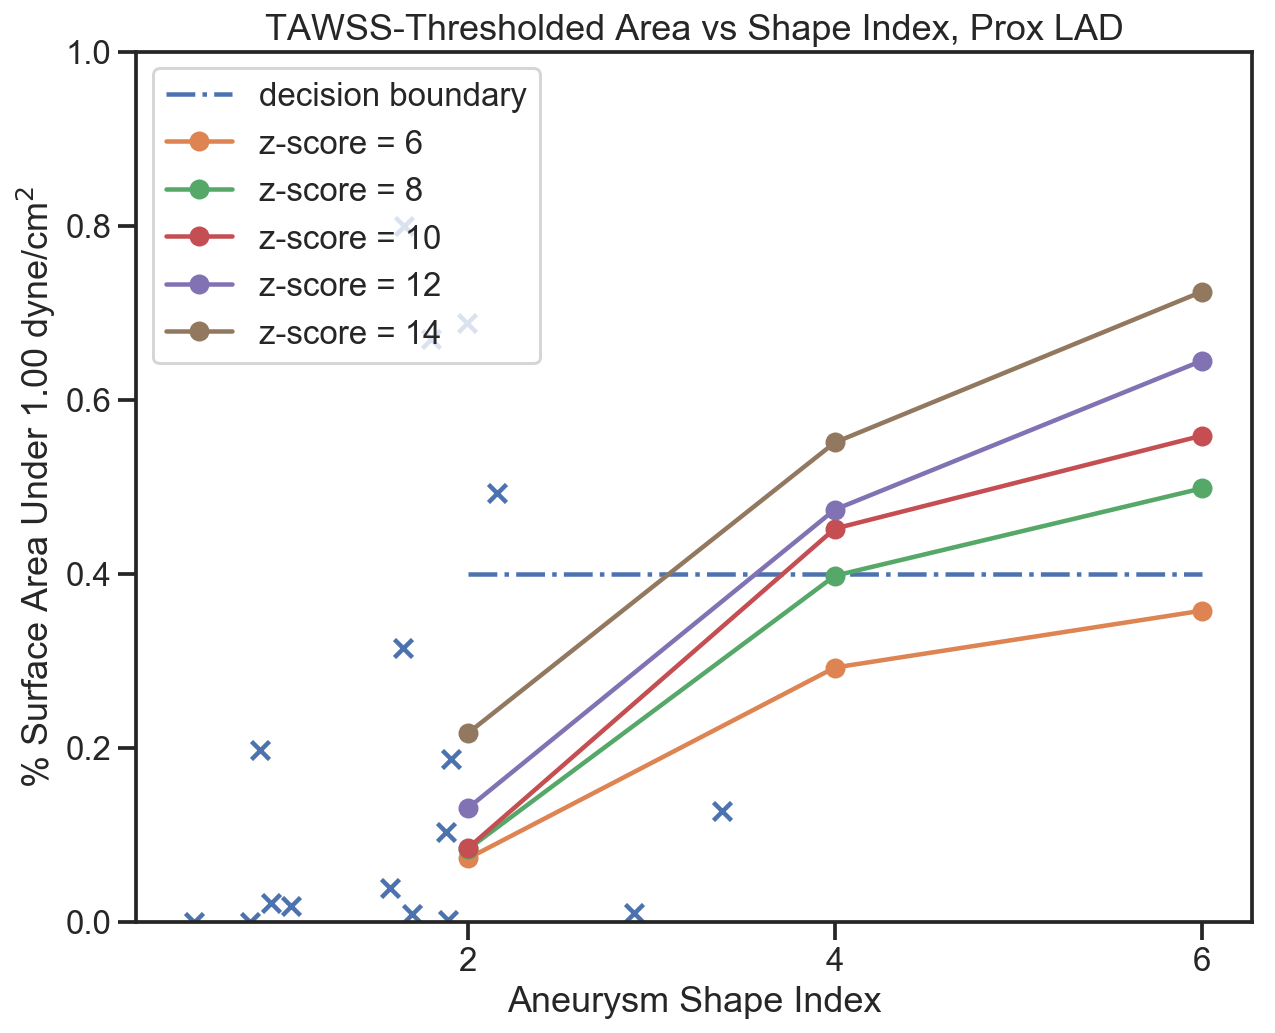

In [30]:
labels = ['prox', 'med', 'dist']
plotted_z_scores = [6, 8, 10, 12, 14]
threshold_bounds = np.arange(.05, 10.0, .5)
plot_idx = 2

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
ax.plot([2, 4, 6], [.4, .4, .4], linestyle='-.', label='decision boundary')

for k, size in enumerate(sizes):  
    vtawss_sub_threshold_fracs = np.zeros(len(shapes))
    for c, shape in enumerate(shapes):
        vtawss_sub_threshold_fracs[c] = area_fracs[shape + '_' + size][plot_idx]
    
    ax.plot([2, 4, 6], vtawss_sub_threshold_fracs, label='z-score = ' + str(plotted_z_scores[k]), marker='o')
    
ax.scatter(real_clin_asis, real_clin_threshold_fracs, marker='x')


plt.legend(loc="upper left")
plt.xlabel('Aneurysm Shape Index', fontname='Arial')
plt.xticks([2, 4, 6])
plt.ylabel(r'% Surface Area Under 1.00 dyne/cm$^2$', fontname='Arial')
#plt.ylabel('Fraction of Surface Area Under %.2f'%(threshold_bounds[plot_idx]))
plt.title('TAWSS-Thresholded Area vs Shape Index, Prox ' + animation_vessel[:-1], fontname='Arial')
plt.ylim(0, 1)
plt.show()


In [31]:
print all_area_fractions_right

{'ASI2_m4': array([3.72162525e-04, 1.14124288e-01, 3.06686455e-01, 4.06008104e-01,
       4.87070721e-01, 5.51253026e-01, 5.90609589e-01, 6.22333537e-01,
       6.47313816e-01, 6.71925232e-01, 6.88699539e-01, 7.01141705e-01,
       7.15657352e-01, 7.29772870e-01, 7.41783178e-01, 7.51545708e-01,
       7.59493055e-01, 7.68537314e-01, 7.78094394e-01, 7.85667314e-01]), 'ASI2_m5': array([0.00084155, 0.14348627, 0.34576971, 0.4433132 , 0.54157243,
       0.59535192, 0.63120123, 0.65717592, 0.68363758, 0.70408644,
       0.72015319, 0.73722505, 0.7526097 , 0.76507441, 0.77591412,
       0.78591889, 0.79407512, 0.80417773, 0.81243708, 0.82218168]), 'ASI2_m1': array([0.        , 0.02268436, 0.09832771, 0.2473909 , 0.35214442,
       0.40197653, 0.44269403, 0.47546733, 0.50521035, 0.52674416,
       0.54332047, 0.56329128, 0.5781512 , 0.59586567, 0.61053036,
       0.627053  , 0.63948995, 0.65351283, 0.66773385, 0.67904487]), 'ASI2_m2': array([0.        , 0.04616233, 0.15663001, 0.31738979, 0.4

In [32]:
print right_volumes


{'ASI6': {'prox': [1.4014, 1.4651, 2.109, 2.9514, 4.0107]}, 'ASI4': {'prox': [0.90235, 1.3218, 1.9063, 2.5823, 2.8892]}, 'ASI2': {'med': [0.2626, 0.40586, 0.58183, 0.80693, 1.0183], 'dist': [0.19253, 0.30718, 0.45923, 0.65179, 0.89421], 'prox': [0.37912, 0.48379, 0.68129, 0.88389, 1.1165]}}


Text(0.5,1,'TAWSS-Thresholded Area vs Aneurysm Volume')

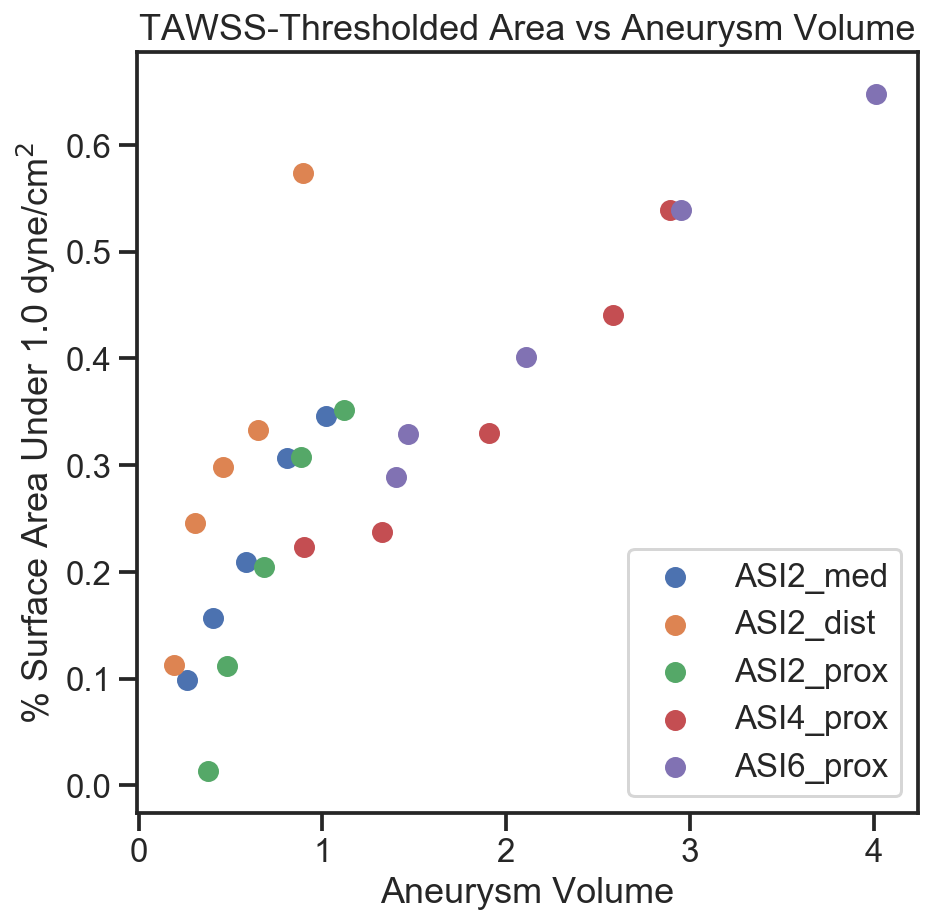

In [33]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)

for shape in shapes: 
    pos_sizes = {'prox': proximal, 
                 'med': medial, 
                 'dist': distal}
    
    if shape == 'ASI6' or shape == 'ASI4': 
        pos_sizes = {'prox': proximal}
        
    
    for position, size_list in pos_sizes.iteritems():
        accumulated = []
        for size in size_list: 
            accumulated.append(all_area_fractions_right[shape + '_' + size][2])
        ax.scatter(right_volumes[shape][position], accumulated, label='_'.join([shape, position]))

plt.legend()
plt.ylabel(r'% Surface Area Under 1.0 dyne/cm$^2$')
plt.xlabel('Aneurysm Volume')
plt.title('TAWSS-Thresholded Area vs Aneurysm Volume')